In [2]:
import nltk
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
import re
import collections
import math
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import tensorflow as tf
%matplotlib inline


In [3]:
xls = pd.ExcelFile('Disbursement - Merge Data.xlsx')
df1 = pd.read_excel(xls, 'Loan Sheet')
df2 = pd.read_excel(xls, 'Customer data Sheet')
df1=df1.apply(lambda x:x.astype(str).str.lower())
df2=df2.apply(lambda x:x.astype(str).str.lower())

In [4]:
#df1.head()

In [5]:
#df2.head()

In [6]:
#df1.info()

In [7]:
#df2.info()

Text(0, 0.5, 'Loans disembursed')

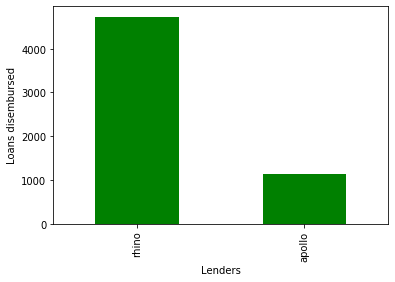

In [8]:
df1.Lender.value_counts().plot.bar(color='green')
plt.xlabel("Lenders")
plt.ylabel("Loans disembursed")

Text(0, 0.5, 'Loans disembursed')

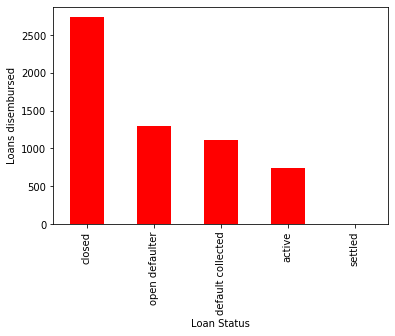

In [9]:
df1['LOAN STATUS'].value_counts().plot(kind='bar',color="red")
plt.xlabel("Loan Status")
plt.ylabel("Loans disembursed")

In [10]:
set(df1["LOAN STATUS"])

{'active', 'closed', 'default collected', 'open defaulter', 'settled'}

In [11]:
s=0
for i in range(0,len(df1)):
    if df1["EMI-1 COLLECTION STATUS"][i]=="collected ":
        df1["EMI-1 COLLECTION STATUS"][i]="collected"
    if df1["EMI-1 COLLECTION STATUS"][i]=="failed ":
        df1["EMI-1 COLLECTION STATUS"][i]="failed"

In [12]:
Rhino=df1[df1['Lender'] == "rhino"]
print(Rhino["LOAN STATUS"].value_counts())
print("\n")
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

closed               2003
open defaulter       1154
default collected     838
active                740
Name: LOAN STATUS, dtype: int64


collected    3903
failed       1243
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [13]:
Apollo=df1[df1['Lender'] == "apollo"]
print(Apollo["LOAN STATUS"].value_counts())

closed               736
default collected    271
open defaulter       138
settled                1
Name: LOAN STATUS, dtype: int64


In [14]:
df1["LOAN STATUS"].value_counts()

closed               2739
open defaulter       1292
default collected    1109
active                740
settled                 1
Name: LOAN STATUS, dtype: int64

In [15]:
print(Apollo["EMI-1 COLLECTION STATUS"].value_counts())

collected    1017
failed        129
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [16]:
print(df1["EMI-1 COLLECTION STATUS"].value_counts())

collected    3903
failed       1243
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [17]:
print(Rhino["EMI-1 COLLECTION STATUS"].value_counts())

collected    2886
failed       1114
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64


In [18]:
set(Rhino["EMI-1 COLLECTION STATUS"])

{'collected', 'failed', 'nan'}

Text(0, 0.5, 'Number of loans disembursed by Rhino')

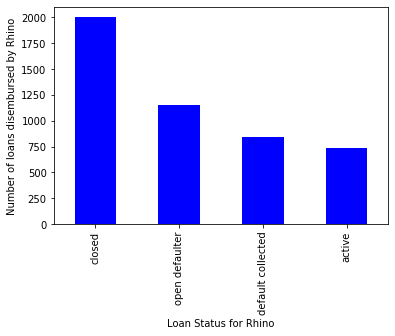

In [19]:
Rhino['LOAN STATUS'].value_counts().plot(kind='bar',color="blue")
plt.xlabel("Loan Status for Rhino")
plt.ylabel("Number of loans disembursed by Rhino")

Text(0, 0.5, 'Number of loans disembursed by Apollo')

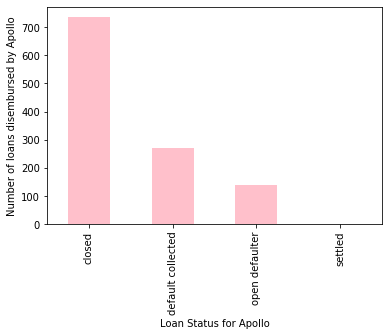

In [20]:
Apollo['LOAN STATUS'].value_counts().plot(kind='bar',color="pink")
plt.xlabel("Loan Status for Apollo")
plt.ylabel("Number of loans disembursed by Apollo")

In [21]:
#df1.iloc[0:100, 1:5]

In [22]:
len(df1.columns)

52

In [23]:
len(df2.columns)

50

In [24]:
l=[]
l1=[]#df1 column names
for i in range(0,len(df1.columns)):
    l.append(df1.columns[i])
    l1.append(df1.columns[i])

In [25]:
l2=[]#df2 column names not in df1
drop=[]
for i in range(0,len(df2.columns)):
    if df2.columns[i] not in l:
        l.append(df2.columns[i])
        l2.append(df2.columns[i])
    if df2.columns[i] in l1:#df1 columns which are in df2 too
        drop.append(df2.columns[i])

In [26]:
drop

['SR NO.',
 'DATE',
 'LOAN ID',
 'APPLICANT FIRST NAME',
 'APPLICANT LAST NAME',
 'LOAN AMOUNT',
 'Loan Term ',
 'Interest Type',
 'INTEREST RATE',
 'INTEREST AMOUNT',
 'EMI AMOUNT',
 'PROCESSING FEES',
 'GST (18%)',
 'Pre-emi interest',
 'DISBURSED AMOUNT',
 'Mode of Disbursement',
 'DATE OF DISBURSEMENT',
 'No. of Installments',
 'EMI DUE DATE',
 'EMI END DATE',
 'Lender',
 'LOAN STATUS']

In [27]:
len(l)

80

In [28]:
len(l2)

28

In [29]:
df2_1=df2.drop(drop,axis=1)

In [30]:
data=pd.concat([df1, df2_1], axis=1, sort=False)

In [31]:
data.head(5)

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,nan,0.36,...,680.0,daily needs,nan,nan,zoroastrian co op bank limited,nan,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,nan,0.36,...,694.0,others,nan,nan,axis bank,nan,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,nan,0.36,...,648.0,daily needs,nan,nan,axis bank,nan,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,nan,0.36,...,702.0,medical expenses,nan,nan,axis bank,nan,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,nan,0.36,...,679.0,daily needs,nan,nan,kotak mahindra bank,nan,chandrakant thakare,9769206128.0,mahesh shinde,9769206114


In [32]:
for i in range(0,len(data)):
    data["No. of Installments"][i]=int(data["No. of Installments"][i])

data=data[data["No. of Installments"]==1]
data 

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,nan,0.36,...,680.0,daily needs,nan,nan,zoroastrian co op bank limited,nan,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,nan,0.36,...,694.0,others,nan,nan,axis bank,nan,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,nan,0.36,...,648.0,daily needs,nan,nan,axis bank,nan,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,nan,0.36,...,702.0,medical expenses,nan,nan,axis bank,nan,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,nan,0.36,...,679.0,daily needs,nan,nan,kotak mahindra bank,nan,chandrakant thakare,9769206128.0,mahesh shinde,9769206114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,5877,active,2020-04-02,396135,ankita,shedage,3000,15,flat,36,...,700.0,medical expenses,monthly,months,hdfc bank ltd.,savings,sameer shinde,9867153537.0,kanchan,7498127350
5877,5878,active,2020-04-02,406727,vitthal,borate,6000,30,flat,36,...,6.0,others,monthly,months,hdfc bank ltd.,savings,sakharam,8888374380.0,rakesh,7249825693
5878,5879,active,2020-04-02,407019,nilesh,shetw,7000,30,flat,36,...,407.0,daily needs,monthly,months,axis bank,savings,chetan raskar,9921522285.0,aviral sharma,9766115500
5879,5880,active,2020-04-02,409060,dattesh kumar,nachaegari,6000,30,flat,36,...,386.0,home furnishing,monthly,months,icici bank ltd.,savings,rohit ramavashi,9920353748.0,ganesh yadav,9769794899


In [33]:
data=data.drop(['No. of Installments'], axis=1)

data.head(5)

,SR NO.,LOAN STATUS,DATE,LOAN ID,APPLICANT FIRST NAME,APPLICANT LAST NAME,LOAN AMOUNT,Loan Term,Interest Type,INTEREST RATE,...,CREDIT SCORE,LOAN PURPOSE,Payment Frequency,Loan Tenure unit,CUSTOMER'S BANK NAME,Customer bank account type,NAME OF THE REFERENCE 1,CONTACT NUMBER,NAME OF THE REFERENCE 2,CONTACT NUMBER
0,1,closed,2019-02-21,11272,kaiomarz,kekuna,10000,45,nan,0.36,...,680.0,daily needs,nan,nan,zoroastrian co op bank limited,nan,arun shinde,9767756915.0,sachin ghadge,9702200856
1,2,closed,2019-02-25,9495,ashokkumar,jayakumar,5000,30,nan,0.36,...,694.0,others,nan,nan,axis bank,nan,naveen kumar,8220718746.0,dharik,9600153649
2,3,default collected,2019-02-26,13798,amol,nagare,5000,30,nan,0.36,...,648.0,daily needs,nan,nan,axis bank,nan,kunal,8097141310.0,anita,9271911124
3,4,closed,2019-02-26,12305,prakash,desouza,3000,30,nan,0.36,...,702.0,medical expenses,nan,nan,axis bank,nan,james christian,9898259847.0,pintu christian,8780098879
4,5,closed,2019-02-27,11754,ravi,mandavkar,3000,30,nan,0.36,...,679.0,daily needs,nan,nan,kotak mahindra bank,nan,chandrakant thakare,9769206128.0,mahesh shinde,9769206114


In [34]:
#len(df)
#df=df[data.LOAN_STATUS != 'active']
#Sl_no=[i for i in range(0,len(data))]
#data["Sl_no"]=Sl_no
#df.head()
#data=data.set_index("Sl_no") 
#data=data.drop(['SR NO'])
data=data.reset_index(drop=True)

In [35]:
print(data["GENDER"].value_counts())

male      4996
female     450
Name: GENDER, dtype: int64


In [36]:
data.columns=data.columns.str.replace(r" ", '_')
data.columns=data.columns.str.replace(r".", '')

Text(0, 0.5, 'Number of loans disembursed by Rhino')

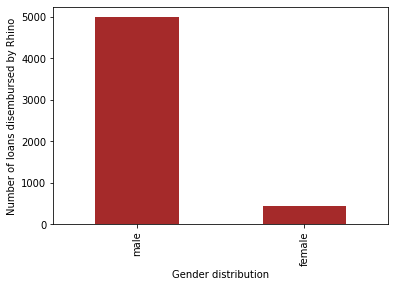

In [37]:
data['GENDER'].value_counts().plot(kind='bar',color="brown")
plt.xlabel("Gender distribution")
plt.ylabel("Number of loans disembursed by Rhino")

In [38]:
print(list(data["STATE"].value_counts()))

[1436, 650, 606, 493, 447, 425, 262, 215, 177, 167, 129, 84, 72, 70, 64, 28, 26, 19, 17, 16, 10, 9, 7, 7, 5, 3, 1, 1]


In [39]:
dict_state=dict( data["STATE"].value_counts() )
dict_state.keys()

dict_keys(['maharashtra', 'karnataka', 'telangana', 'gujarat', 'delhi', 'tamil nadu', 'uttar pradesh', 'rajasthan', 'andhra pradesh', 'haryana', 'madhya pradesh', 'punjab', 'bihar', 'kerala', 'odisha', 'assam', 'chhattisgarh', 'jharkhand', 'west bengal', 'uttarakhand', 'goa', 'chandigarh', 'puducherry (pondicherry)', 'himachal pradesh', 'dadar and nagar haveli', 'tripura', 'new delhi south', 'jammu and kashmir'])

In [40]:
set(data["STATE"])

{'andhra pradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadar and nagar haveli',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachal pradesh',
 'jammu and kashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'madhya pradesh',
 'maharashtra',
 'new delhi south',
 'odisha',
 'puducherry (pondicherry)',
 'punjab',
 'rajasthan',
 'tamil nadu',
 'telangana',
 'tripura',
 'uttar pradesh',
 'uttarakhand',
 'west bengal'}

Text(0, 0.5, 'States')

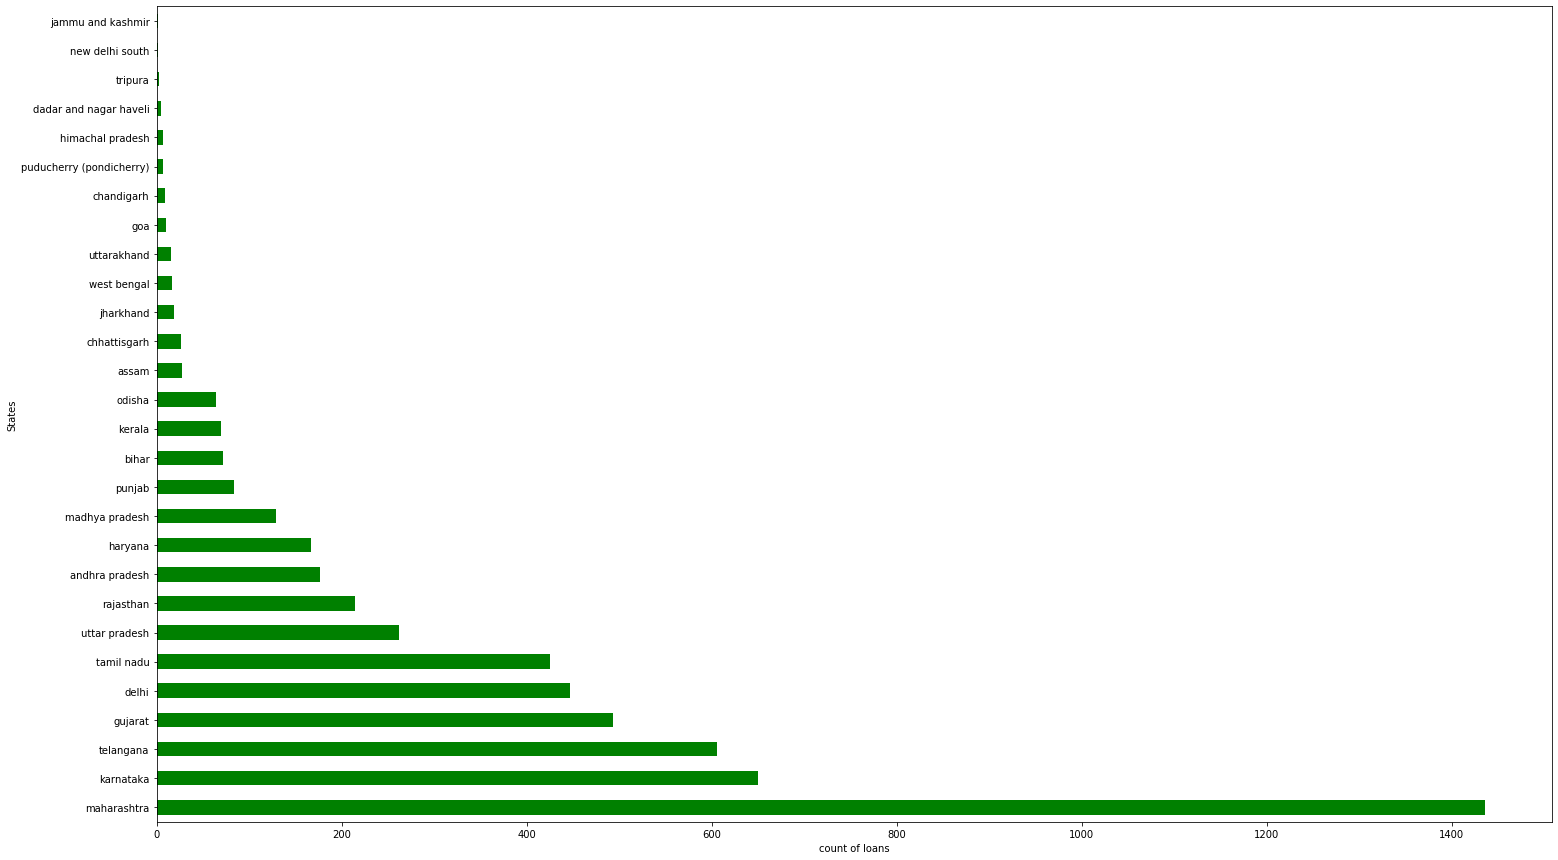

In [41]:
#g = sns.countplot(y=list(data["STATE"]), order=list(dict_state.keys()),size=(20,10))
#g.set_ylabel("States")
#g.set_title('Distribution of Loans')
#plt.show()
data['STATE'].value_counts().head(30).plot( kind='barh',figsize=(25,15),color="green")
plt.xlabel("count of loans")
plt.ylabel("States")

In [42]:
inc=list(data['NET_MONTHLY_INCOME'])
inc=[int(i) for i in inc]
data["NET_MONTHLY_INCOME"]=data["NET_MONTHLY_INCOME"].astype('int64')

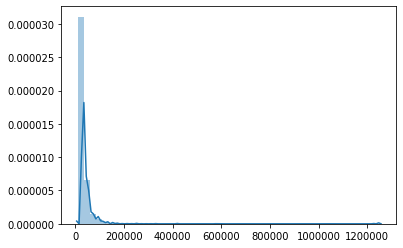

In [43]:
sns.distplot(inc)#monthly income vs no. of loans

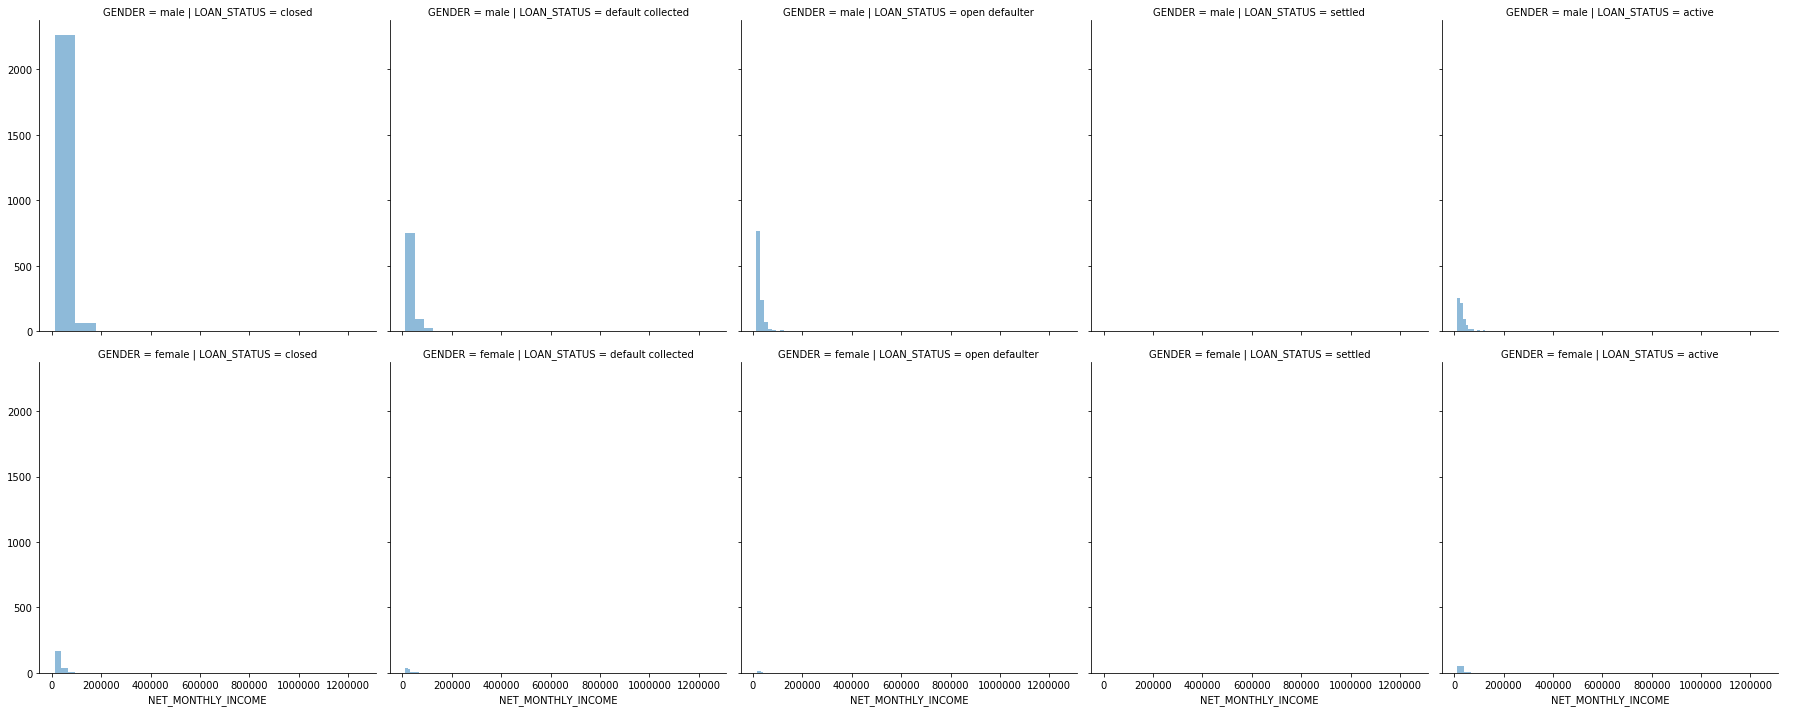

In [44]:
g = sns.FacetGrid(data, row='GENDER', col='LOAN_STATUS', height=5)
g.map(plt.hist, 'NET_MONTHLY_INCOME', alpha=0.5, bins=15,)
g.add_legend()
plt.show()

#sns.palplot(sns.color_palette("RdBu", n_colors=7))

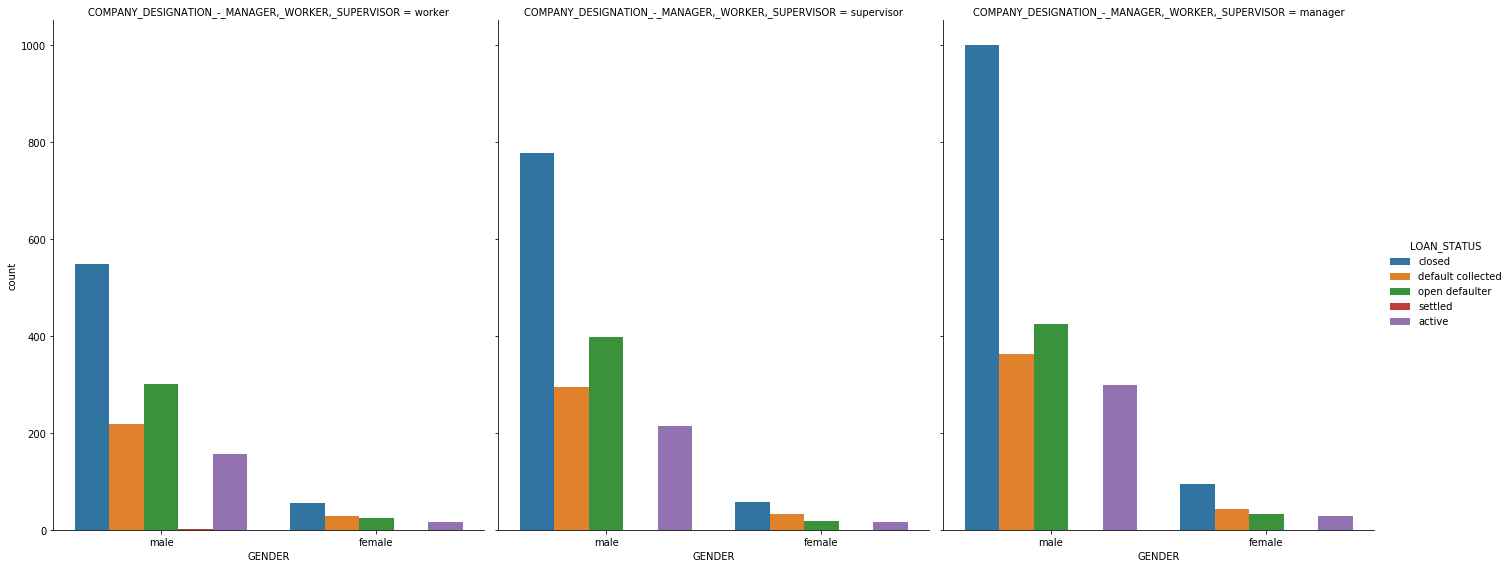

In [45]:
g = sns.catplot(x="GENDER", hue="LOAN_STATUS", col="COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR",
                data=data, kind="count",
                height=8, aspect=0.8);


In [46]:
list(data["CREDIT_SCORE"])
#set(data["NET_MONTHLY_INCOME"])
data["CREDIT_SCORE"]=data["CREDIT_SCORE"].str.replace("nan","0")
#data["CREDIT_SCORE"].fillna(data["CREDIT_SCORE"].mean())
for i in range(0,len(data)):
    data["CREDIT_SCORE"][i]=int(float(data["CREDIT_SCORE"][i]))


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
list(set(data["CREDIT_SCORE"]))

[0,
 1,
 4,
 5,
 6,
 319,
 327,
 330,
 331,
 333,
 339,
 343,
 345,
 347,
 352,
 357,
 361,
 364,
 365,
 367,
 369,
 370,
 371,
 372,
 373,
 378,
 379,
 381,
 382,
 384,
 386,
 387,
 388,
 391,
 392,
 395,
 397,
 398,
 400,
 401,
 402,
 404,
 405,
 406,
 407,
 408,
 410,
 411,
 412,
 413,
 414,
 416,
 417,
 418,
 419,
 420,
 421,
 423,
 424,
 425,
 426,
 427,
 428,
 430,
 431,
 432,
 435,
 436,
 437,
 438,
 439,
 441,
 442,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 457,
 459,
 461,
 462,
 463,
 464,
 465,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 489,
 490,
 491,
 492,
 493,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 5

In [48]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
CONTACT_NUMBER,0,0.0
Interest_Charged_(IC)-1,0,0.0
Bounce_Charges_(BC),0,0.0
GST_ON_BC,0,0.0
EMI-1_COLLECTION_STATUS,0,0.0
EMI-1COLLECTED_AMOUNT,0,0.0
COLLECTION_DATE-1,0,0.0
EMI_Date-1,0,0.0
Defaulter_Tenure_(DT)-1,0,0.0
GST_ON_IC-1,0,0.0


In [49]:
for i in range(0,len(data)):
    if list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="owned"or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="self-owned":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="self owned"
    elif list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="parent-owned" or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]==" parent owned":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="parent owned"
    elif list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]==" rented" or list(data['RESIDENTIAL_STATUS-OWNED/RENTED'])[i]=="rented(company provided room)":
        data['RESIDENTIAL_STATUS-OWNED/RENTED'][i]="rented"
    

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
data['RESIDENTIAL_STATUS-OWNED/RENTED'].value_counts()

parent owned    2696
rented          1524
self owned      1226
Name: RESIDENTIAL_STATUS-OWNED/RENTED, dtype: int64

In [51]:
resi=dict(data['RESIDENTIAL_STATUS-OWNED/RENTED'].value_counts())
resi

{'parent owned': 2696, 'rented': 1524, 'self owned': 1226}

# Percentage of loans as per Residential-Status

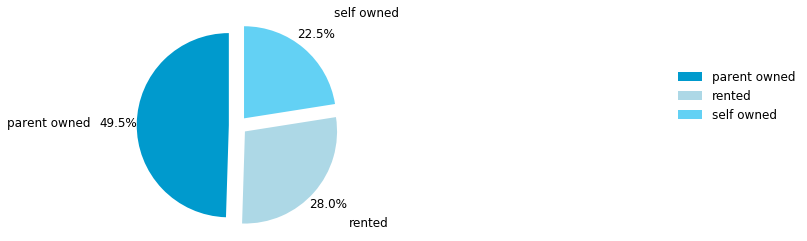

In [52]:
fig, ax = plt.subplots()
#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#909090'
#plt.rcParams['axes.labelcolor']= '#909090'
#plt.rcParams['xtick.color'] = '#909090'
#plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

labels =  list(resi.keys())
percentages =list(resi.values())
explode=(0.1,0.1,0.1)
ax.pie(percentages, labels=labels,explode=explode,colors=color_palette_list[0:], autopct='%1.1f%%',shadow=False, startangle=90,   
       pctdistance=1.2,labeldistance=1.5)
ax.axis('equal')
#ax.set_title("Percentage of loans as per Residential-Status")
ax.legend(frameon=False, bbox_to_anchor=(2.2,0.8))

In [53]:
data["LOAN_AMOUNT"]=data["LOAN_AMOUNT"].astype("int64")
#data["CREDIT_SCORE"]=data["CREDIT_SCORE"].astype("float64")

In [54]:
#fig, ax = plt.subplots(figsize=(15,6))

#sns.swarmplot(y="LOAN_AMOUNT",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [55]:
#fig, ax = plt.subplots(figsize=(15,10))

#sns.swarmplot(y="NET_MONTHLY_INCOME",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [56]:
#fig, ax = plt.subplots(figsize=(15,10))

#sns.swarmplot(y="CREDIT_SCORE",x="LOAN_STATUS",hue='OCCUPATION',data=data,palette="Set1", dodge=True,size=5,ax=ax)
#plt.tight_layout()

In [57]:
#sns.swarmplot(x="COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR", y="NET_MONTHLY_INCOME", data=data)

In [58]:
cr=[]
income=[]
for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]!=30486:
        cr.append(data["CREDIT_SCORE"][i])
        income.append(data["NET_MONTHLY_INCOME"][i])


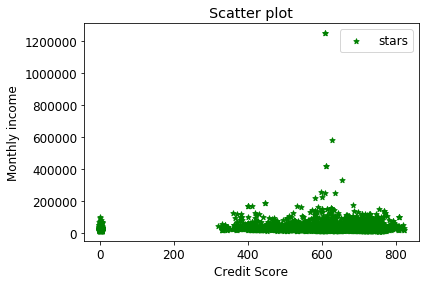

In [59]:
# x-axis values 
x =cr
# y-axis values 
y =income
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('Credit Score') 
# frequency label 
plt.ylabel('Monthly income') 
# plot title 
plt.title('Scatter plot') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [60]:
#sns.swarmplot(x="GENDER", y="NET MONTHLY INCOME", data=data)


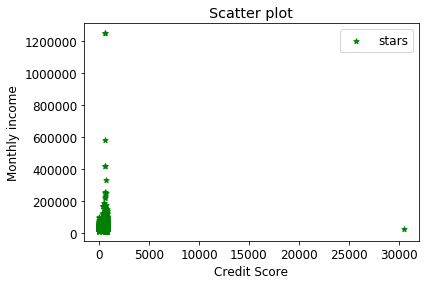

In [61]:
# x-axis values 
y =list(data["NET_MONTHLY_INCOME"])
# y-axis values 
x =list(data["CREDIT_SCORE"])
  
# plotting points as a scatter plot 
plt.scatter(x, y, label= "stars", color= "green",  
            marker= "*", s=30) 
  
# x-axis label 
plt.xlabel('Credit Score') 
# frequency label 
plt.ylabel('Monthly income') 
# plot title 
plt.title('Scatter plot') 
# showing legend 
plt.legend() 
  
# function to show the plot 
plt.show() 

In [62]:
data=data[data["CREDIT_SCORE"]!=30486]
data=data.reset_index(drop=True)

In [63]:
s=0
l=1
for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]!=0:
        s+=data["CREDIT_SCORE"][i]
        l+=1
avg=s/l
avg

for i in range(0,len(data)):
    if data["CREDIT_SCORE"][i]==0:
        data["CREDIT_SCORE"][i]=int(avg)
#list(data["CREDIT_SCORE"])#.value_counts()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



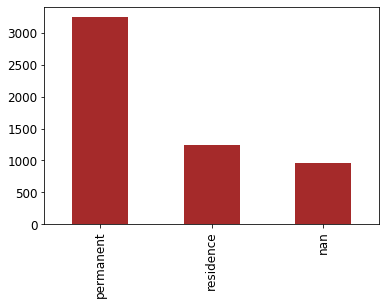

In [64]:
data["Address_type"].value_counts().plot(kind='bar',color='brown')

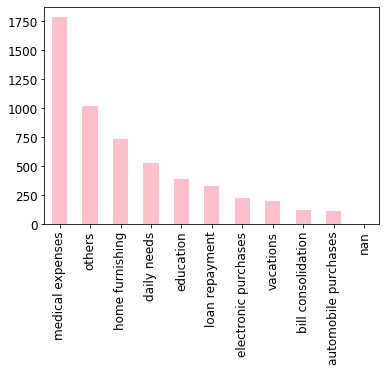

In [65]:
data["LOAN_PURPOSE"].value_counts().plot(kind='bar',color='pink')

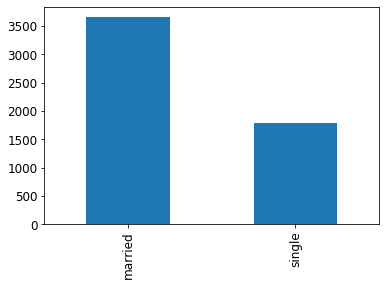

In [66]:
data["MARITAL_STATUS"].value_counts().plot(kind='bar')#,color='')

In [67]:
data["Address_type"].value_counts()

permanent    3248
residence    1237
nan           960
Name: Address_type, dtype: int64

In [68]:
data["DATE_OF_BIRTH"].value_counts()

1989-01-01 00:00:00    10
1991-11-10 00:00:00     9
1990-01-01 00:00:00     9
1994-01-01 00:00:00     9
1977-06-15 00:00:00     8
                       ..
1994-04-13 00:00:00     1
1990-10-13 00:00:00     1
1991-05-18 00:00:00     1
1989-11-15 00:00:00     1
1987-09-24 00:00:00     1
Name: DATE_OF_BIRTH, Length: 2974, dtype: int64

In [69]:
year=[]
month=[]
day=[]
for i in range(0,len(data)):
    data["DATE_OF_BIRTH"][i]=data["DATE_OF_BIRTH"][i][:10]
   
    if "/" not in data["DATE_OF_BIRTH"][i]:
    
        year.append(int(data["DATE_OF_BIRTH"][i][:4]))
        month.append(int(data["DATE_OF_BIRTH"][i][5:7]))
        day.append(int(data["DATE_OF_BIRTH"][i][8:]))
        
    elif "/" in list(data["DATE_OF_BIRTH"])[i]:
        
        year.append(int(data["DATE_OF_BIRTH"][i][6:]))
        month.append(int(data["DATE_OF_BIRTH"][i][3:5]))
        day.append(int(data["DATE_OF_BIRTH"][i][:2]))
        

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
from datetime import date 
  
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day)) 
  
    return age 
      
# Driver code 
age=[]
for i in range(0,len(data)):
    age.append(calculateAge(date(year[i],month[i],day[i])))
    
#print(calculateAge(date(1998,12 , 21)), "years") 

In [71]:
#age

In [72]:
data["Age"]=age

In [73]:
age_range=[]
for i in range(0,len(age)):
    if age[i]>=20 and age[i]<=30:
        age_range.append("20-30")
    if age[i]>30 and age[i]<=40:
        age_range.append("30-40")
    if age[i]>40 and age[i]<=50:
        age_range.append("40-50")
    if age[i]>50 and age[i]<=60:
        age_range.append("50-60")
    if age[i]>60 and age[i]<=70:
        age_range.append("60-70")


Text(0, 0.5, 'Number of loans')

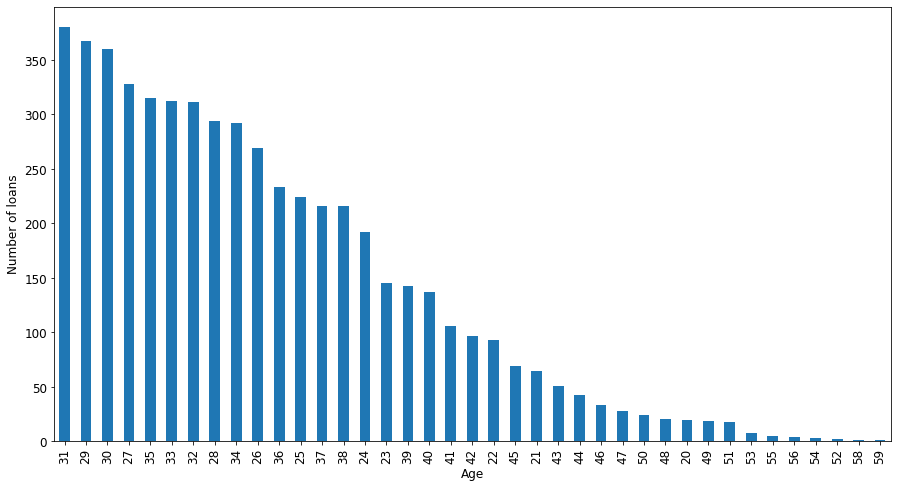

In [74]:
data["Age"].value_counts().plot(kind='bar',figsize=(15,8))
plt.xlabel("Age")
plt.ylabel("Number of loans")

In [75]:
data["Age_range"]=age_range

Text(0, 0.5, 'Number of loans')

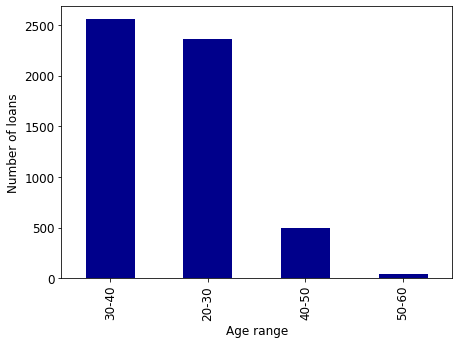

In [76]:
data["Age_range"].value_counts().plot(kind='bar',figsize=(7,5),color="darkblue")
plt.xlabel("Age range")
plt.ylabel("Number of loans")

In [77]:
#sns.swarmplot(x="Age range",y="LOAN STATUS",hue='GENDER',data=data,palette="Set1", dodge=True)

Text(0.5, 0, 'Number of loans')

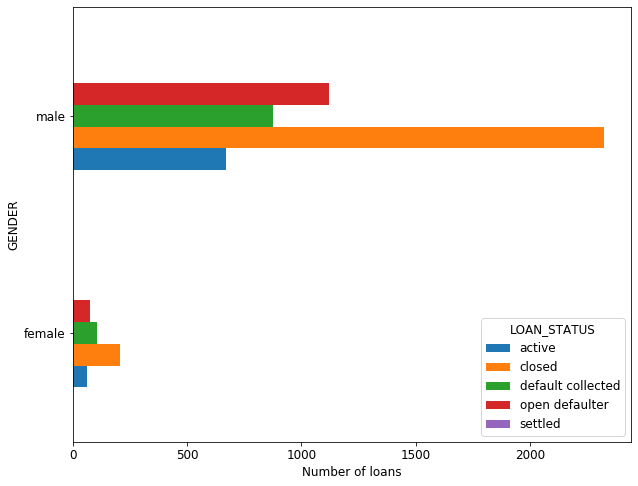

In [78]:
data.groupby('LOAN_STATUS').GENDER.value_counts().unstack(0).plot.barh(figsize=(10,8))
plt.xlabel("Number of loans")

Text(0.5, 0, 'Number of loans')

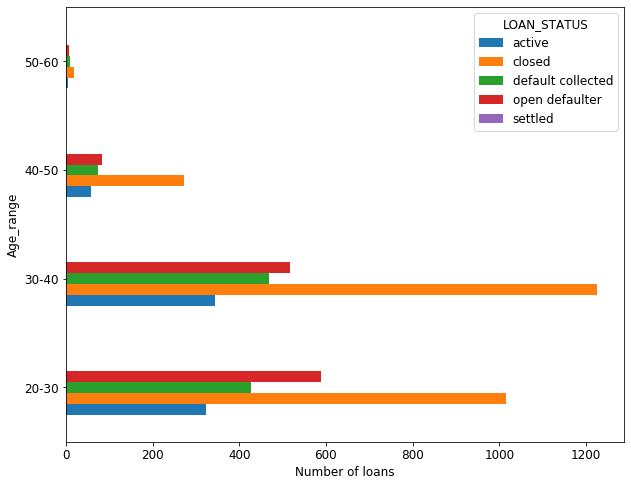

In [79]:
data.groupby('LOAN_STATUS').Age_range.value_counts().unstack(0).plot.barh(figsize=(10,8))
plt.xlabel("Number of loans")

Text(0.5, 0, 'Number of loans')

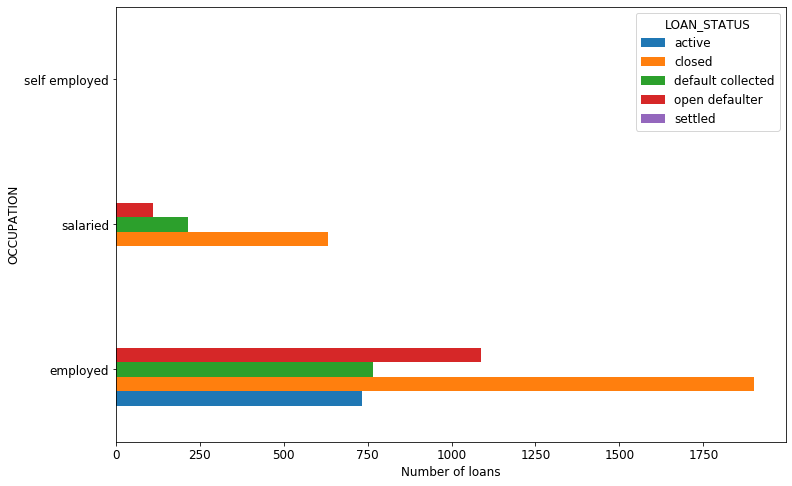

In [80]:
data.groupby('LOAN_STATUS').OCCUPATION.value_counts().unstack(0).plot.barh(figsize=(12,8))
plt.xlabel("Number of loans")

In [81]:
income_range=[]
for i in range(0,len(data)):
    if data["NET_MONTHLY_INCOME"][i]>=10000 and data["NET_MONTHLY_INCOME"][i]<50000:
        income_range.append("10k-50k")
    if data["NET_MONTHLY_INCOME"][i]>=50000 and data["NET_MONTHLY_INCOME"][i]<100000:
        income_range.append("50k-1lakh")
    if data["NET_MONTHLY_INCOME"][i]>=100000 and data["NET_MONTHLY_INCOME"][i]<150000:
        income_range.append("1-1.5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=150000 and data["NET_MONTHLY_INCOME"][i]<200000:
        income_range.append("1.5-2lakh")
    if data["NET_MONTHLY_INCOME"][i]>=200000 and data["NET_MONTHLY_INCOME"][i]<250000:
        income_range.append("2-2.5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=250000 and data["NET_MONTHLY_INCOME"][i]<300000:
        income_range.append("2.5-3lakh")
    if data["NET_MONTHLY_INCOME"][i]>=300000 and data["NET_MONTHLY_INCOME"][i]<400000:
        income_range.append("3-4lakh")
    if data["NET_MONTHLY_INCOME"][i]>=400000 and data["NET_MONTHLY_INCOME"][i]<500000:
        income_range.append("4-5lakh")
    if data["NET_MONTHLY_INCOME"][i]>=500000 and data["NET_MONTHLY_INCOME"][i]<600000:
        income_range.append("5-6lakh")
    if data["NET_MONTHLY_INCOME"][i]>=600000 and data["NET_MONTHLY_INCOME"][i]<700000:
        income_range.append("6-7lakh")
    if data["NET_MONTHLY_INCOME"][i]>=700000 and data["NET_MONTHLY_INCOME"][i]<800000:
        income_range.append("7-8lakh")
    if data["NET_MONTHLY_INCOME"][i]>=800000 and data["NET_MONTHLY_INCOME"][i]<900000:
        income_range.append("8-9lakh")
    if data["NET_MONTHLY_INCOME"][i]>=900000 and data["NET_MONTHLY_INCOME"][i]<1000000:
        income_range.append("9-10lakh")
    if data["NET_MONTHLY_INCOME"][i]>=1000000 and data["NET_MONTHLY_INCOME"][i]<1300000:
        income_range.append("10-13lakh")
 


In [82]:
data["Income_range"]=income_range
set(list(data["Income_range"]))

{'1-1.5lakh',
 '1.5-2lakh',
 '10-13lakh',
 '10k-50k',
 '2-2.5lakh',
 '2.5-3lakh',
 '3-4lakh',
 '4-5lakh',
 '5-6lakh',
 '50k-1lakh'}

Text(0.5, 0, 'Number of loans')

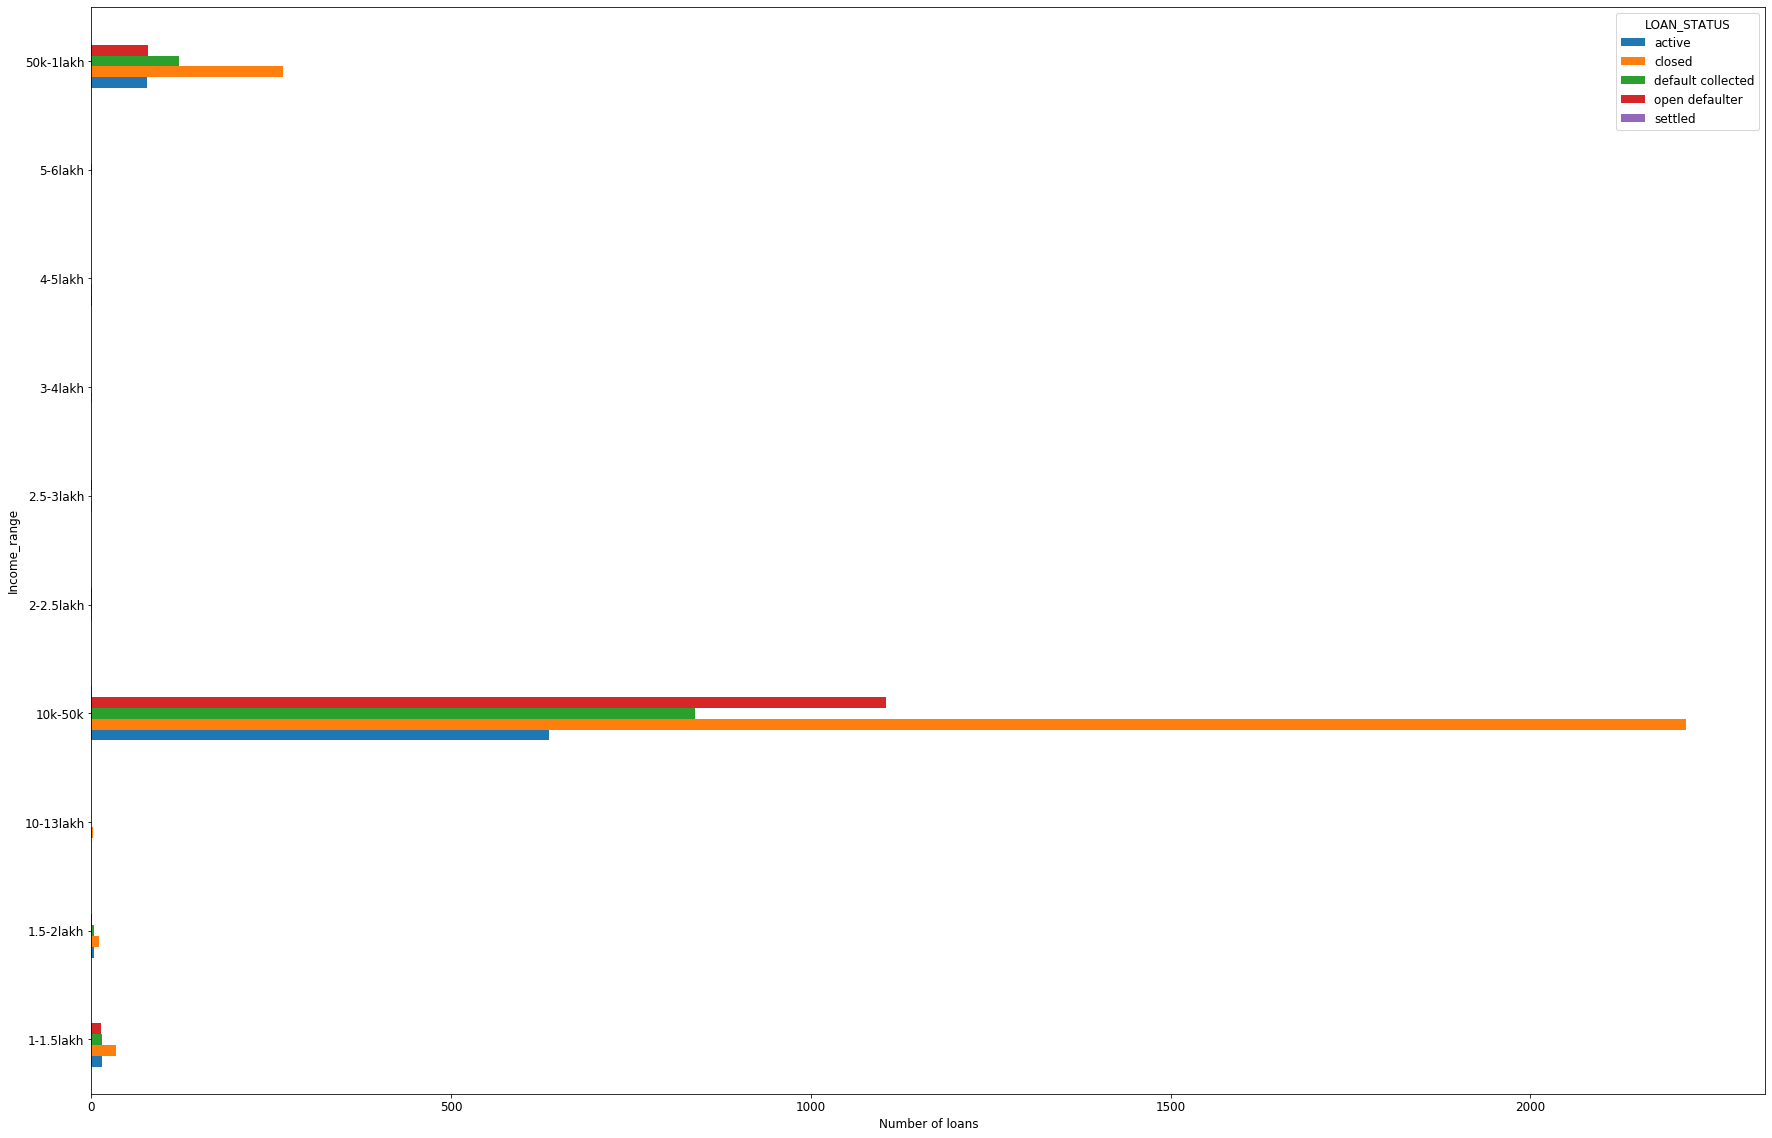

In [83]:
data.groupby('LOAN_STATUS').Income_range.value_counts().unstack(0).plot.barh(figsize=(30,20))
plt.xlabel("Number of loans")

In [84]:
" bfgf ".strip()

'bfgf'

In [85]:
for i in range(0,len(data)):
    #data["CUSTOMER'S_BANK_NAME"][i]=data["CUSTOMER'S_BANK_NAME"][i].strip()
    if "citi" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="citi bank"
        
    if "hdfc" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="hdfc bank"
    
    if "icici" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="icici bank"
        
    if "kotak" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="kotak mahindra bank"
    
    if "idfc" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="idfc bank"
        
    if "idbi" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="idbi bank"
       
    if "karnataka" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="karnataka bank"
        
    if "city" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="city union bank"

    
    if "rbl" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="rbl bank"
        
    if "ujjivan" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="ujjivan small finance bank"
    
    if "bharat" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="bharat bank"
        
    if "au small" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="au small finance bank"
        
    if "zoroastrian" in data["CUSTOMER'S_BANK_NAME"][i]:
        data["CUSTOMER'S_BANK_NAME"][i]="the zoroastrian co-operative bank ltd."
       

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:



In [86]:
set(list(data["CUSTOMER'S_BANK_NAME"]))

{'akhand anand co.op bank ltd.',
 'allahabad bank',
 'andhra bank',
 'au small finance bank',
 'axis bank',
 'bandhan bank limited',
 'bank of baroda',
 'bank of india',
 'bank of maharashtra',
 'bharat bank',
 'canara bank',
 'catholic syrian bank',
 'central bank of india',
 'citi bank',
 'city union bank',
 'corporation bank',
 'dbs bank ltd',
 'dena bank',
 'equitas small finance bank ltd.',
 'federal bank',
 'hdfc bank',
 'hsbc bank',
 'icici bank',
 'idbi bank',
 'idfc bank',
 'indian bank',
 'indian overseas bank',
 'indusind bank',
 'jana small finance bank',
 'karnataka bank',
 'karur vysya bank',
 'kotak mahindra bank',
 'lakshmi vilas bank',
 'oriental bank of commerce',
 'paytm payments bank ltd',
 'punjab & maharashtra co-op bank ltd(pmc)',
 'punjab national bank',
 'ratnakar bank',
 'rbl bank',
 'south indian bank',
 'standard chartered bank',
 'state bank of india',
 'syndicate bank',
 'tamilnad mercantile bank ltd.',
 'the zoroastrian co-operative bank ltd.',
 'ujjivan 

Text(0.5, 0, 'Number of loans')

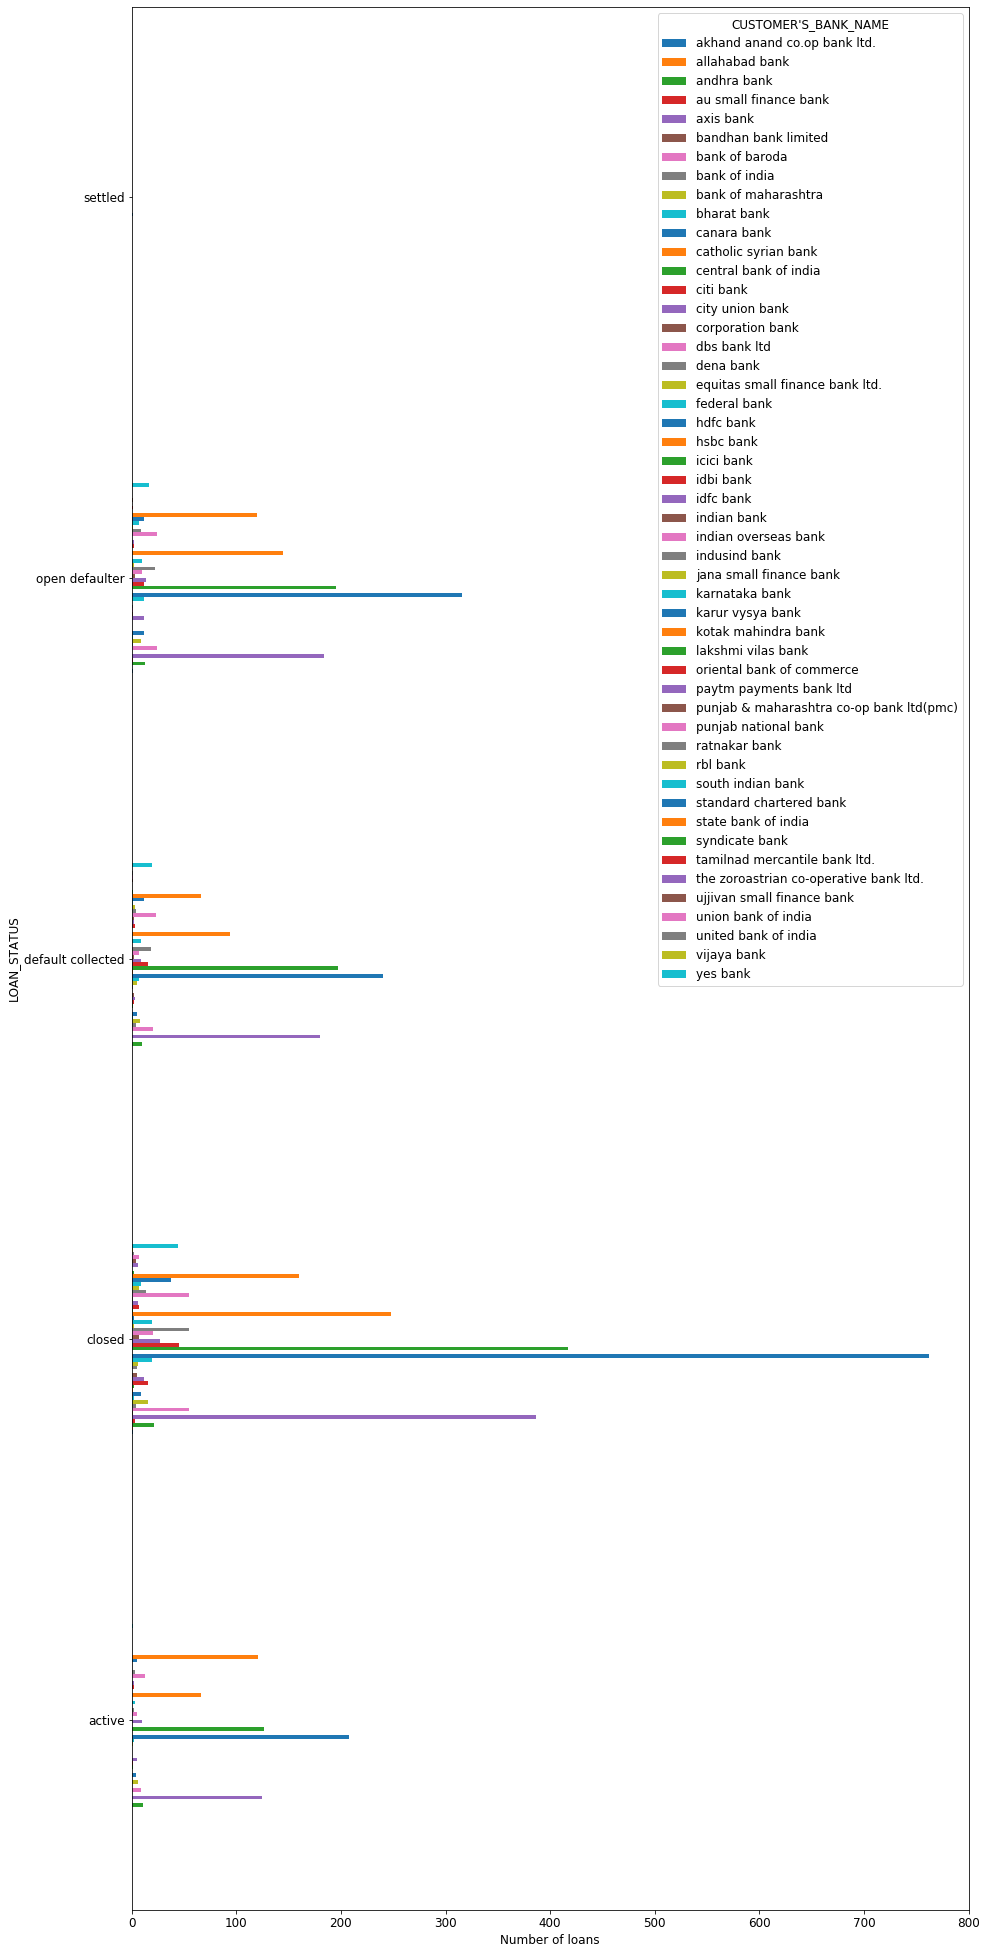

In [87]:
data.groupby("CUSTOMER'S_BANK_NAME").LOAN_STATUS.value_counts().unstack(0).plot.barh(figsize=(15,35))
plt.xlabel("Number of loans")

In [88]:
#data["CUSTOMER'S_BANK_NAME"].value_counts()

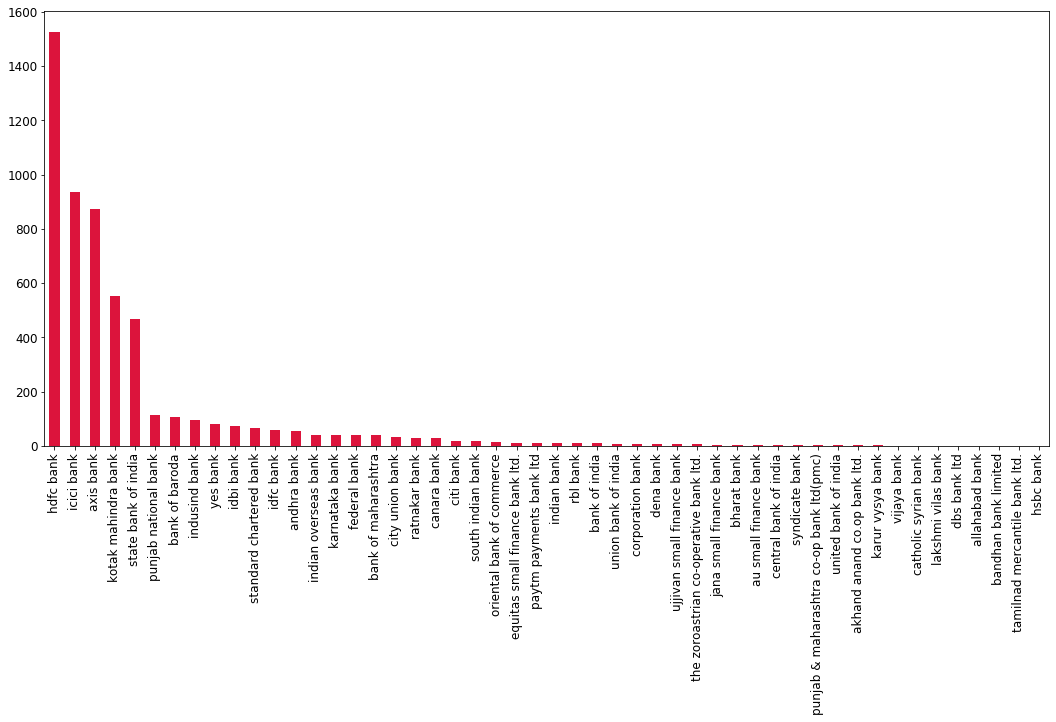

In [89]:
data["CUSTOMER'S_BANK_NAME"].value_counts().plot(kind="bar",figsize=(18,8),color="crimson")

In [90]:
data["Type_of_Application_"]=data["Type_of_Application_"].str.replace(" ","")

In [91]:
l

5323

In [92]:
#list(data["Defaulter_Tenure_(DT)-1"])

In [93]:
#list(data["COLLECTION_DATE-1"])

In [94]:
#data["Loan_Term_"].value_counts()

In [95]:
data["LOAN_STATUS"].value_counts()

closed               2533
open defaulter       1198
default collected     981
active                732
settled                 1
Name: LOAN_STATUS, dtype: int64

In [96]:
df1["EMI-1 COLLECTION STATUS"].value_counts()

collected    3903
failed       1243
nan           735
Name: EMI-1 COLLECTION STATUS, dtype: int64

In [97]:
for i in range(0,len(data)):
    data["INTEREST_RATE"][i]=int(36)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
l

5323

In [99]:
set(data["COMPANY_NAME"])#.value_counts()

{'perapsis infotech pvt ltd',
 'gm modular pvt ltd ',
 'rdc concrete india private ltd',
 'sanzyme private limited ',
 'radiaant expositions ltd ',
 'education department',
 'oxigen services india pvt ltd ',
 'kisan sahkari chini mills ltd, sampurna nagar kheri',
 'pavalam agrotech india limited',
 'sutherland global services pvt ltd ',
 'inditrade microfinance ltd',
 'ivlr group of company',
 'smr holdings pvt ltd ',
 'big basket',
 'wns global services ',
 'rohith mobiles',
 'duprabha protective products pvt ltd',
 'eaton fluid power ltd',
 'barar enterprises',
 'dr lal pathlabs limited ',
 'ikya human capital solutions',
 'optum global solutions india pvt ltd',
 'shahi exports pvt ltd ',
 'amps facilities management ',
 'rukmaplastics',
 'itcube solutions pvt ltd',
 'vpledgedeliveryservice.com ',
 'swastik kitchenware ',
 'bir credit solution private limited',
 'bikham information technology pvt ltd',
 'black and white business solutions pvt ltd',
 'walsons services pvt ltd.',
 'shi

In [100]:
data["Pre-emi_interest"].value_counts()

0    5445
Name: Pre-emi_interest, dtype: int64

In [101]:
len(set(data["COMPANY_NAME"]))

3566

In [102]:
#data1["Mode_of_Disbursement"].value_counts()

In [103]:
#set(list(df2["CITY"]))

In [104]:
for i in range(0,len(data)):
    data["CITY"][i]=data["CITY"][i].strip()
set(list(data["CITY"]))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{',bangalore',
 '122505',
 '400605',
 '495081',
 '560072',
 '560091',
 '562159',
 '673317',
 'abohar',
 'adilabad',
 'adipur',
 'agartala',
 'agra',
 'ahe',
 'ahemdabad',
 'ahemedabad',
 'ahmadabad',
 'ahmedabad',
 'ahmedabad city',
 'ahmedabad gpo',
 'ahmednagar',
 'ajmer',
 'akola',
 'alappuha',
 'alappuzha',
 'aligarh',
 'allahabad',
 'alleppey',
 'alwar',
 'amalner',
 'amaravati',
 'ambajogai',
 'ambala cantt',
 'ambarnath',
 'ambernath',
 'ambur',
 'amravari',
 'amravati',
 'amreli',
 'amritsar',
 'anand',
 'anandnagar',
 'anantapur',
 'angul',
 'anjar',
 'ankleshwar',
 'arakkonam',
 'araria',
 'arrah',
 'aska',
 'auragabad',
 'aurangabad',
 'aurangabad(maharashtra)',
 'azamgarh',
 'badarwas',
 'baddi',
 'badlapur',
 'badlapur.',
 'badlapur.thane',
 'bagalkot',
 'bahraich',
 'balaghat',
 'balasinor',
 'balasore',
 'baleswar',
 'ballari',
 'ballia',
 'banaglore',
 'banasanktha',
 'banashkantha',
 'bandages',
 'bangalore',
 'bangalore east',
 'bangalore gpo',
 'bangalore south',
 'b

In [105]:
for i in range(0,len(data)):
    
    
    if "bengal" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "bang" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "banag" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    
    if "ahem" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahmeda" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahma" in data["CITY"][i]:
        data["CITY"][i]="ahmedabad"
    if "ahmednagar" in data["CITY"][i]:
        data["CITY"][i]="ahmednagar"
    if "alapp" in data["CITY"][i]:
        data["CITY"][i]="alappuzha"
    if "ambarnath" in data["CITY"][i]:
        data["CITY"][i]="ambernath"
    if "amrav" in data["CITY"][i]:
        data["CITY"][i]="amravati"
    if data["CITY"][i]=="ahe":
        data["CITY"][i]="ahmedabad"
        
    if "aurangabad" in data["CITY"][i]:
        data["CITY"][i]="aurangabad"
    if "badlapur" in data["CITY"][i]:
        data["CITY"][i]="badlapur"
    if "alapp" in data["CITY"][i]:
        data["CITY"][i]="alappuzha"
        
    if "bhavnagar" in data["CITY"][i]:
        data["CITY"][i]="bhavnagar"
    if "billimora" in data["CITY"][i]:
        data["CITY"][i]="bilimora"
    if "chennai" in data["CITY"][i]:
        data["CITY"][i]="chennai"
    if "dehli" in data["CITY"][i]:
        data["CITY"][i]="delhi"
    if "delh" in data["CITY"][i]:
        data["CITY"][i]="delhi"
    
        
    if "dombivli" in data["CITY"][i]:
        data["CITY"][i]="dombivali"
    if "gandhidam" in data["CITY"][i]:
        data["CITY"][i]="gandhidham"
    if "gautam" in data["CITY"][i]:
        data["CITY"][i]="gautambudh nagar"
    if "ghandhdham" in data["CITY"][i]:
        data["CITY"][i]="gandhidham"
    if "ghazibad" in data["CITY"][i]:
        data["CITY"][i]="ghaziabad"    
        
    
    if "gotam" in data["CITY"][i]:
        data["CITY"][i]="gautambudh nagar"
    if "noida" in data["CITY"][i]:
        data["CITY"][i]="noida"
    if "hanuma" in data["CITY"][i]:
        data["CITY"][i]="hanumangarh"
    if "hyd" in data["CITY"][i]:
        data["CITY"][i]="hyderabad"   
    
    if "indore" in data["CITY"][i]:
        data["CITY"][i]="indore"
    if "jaipur" in data["CITY"][i]:
        data["CITY"][i]="jaipur"
    if "jajapur" in data["CITY"][i]:
        data["CITY"][i]="jajpur"
    if "jamnaga" in data["CITY"][i]:
        data["CITY"][i]="jamnagar"
        
    if "kalyan" in data["CITY"][i]:
        data["CITY"][i]="kalyan"
    if "kanpur" in data["CITY"][i]:
        data["CITY"][i]="kanpur"
    if "kochi" in data["CITY"][i]:
        data["CITY"][i]="kochi"
    if "kolkata" in data["CITY"][i]:
        data["CITY"][i]="kolkata"
    if "kurn" in data["CITY"][i]:
        data["CITY"][i]="kurnool"
    if "ludhiana" in data["CITY"][i]:
        data["CITY"][i]="ludhiana"
        
    if "modi" in data["CITY"][i]:
        data["CITY"][i]="modinagar"
    if "mul" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "mum" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "nagpur" in data["CITY"][i]:
        data["CITY"][i]="nagpur"
     
    if "nande" in data["CITY"][i]:
        data["CITY"][i]="nanded"
    if "nasik" in data["CITY"][i]:
        data["CITY"][i]="nashik"
    if "mumbai" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "navi" in data["CITY"][i]:
        data["CITY"][i]="mumbai"
    if "goa" in data["CITY"][i]:
        data["CITY"][i]="goa"
        
    if "pimpri-chinchwad" in data["CITY"][i]:
        data["CITY"][i]="pimpri chinchwad"
    if "puduk" in data["CITY"][i]:
        data["CITY"][i]="pudukottai"
    if "pune" in data["CITY"][i]:
        data["CITY"][i]="pune"
        
    if "thane" in data["CITY"][i]:
        data["CITY"][i]="thane"
    if "suryapet" in data["CITY"][i]:
        data["CITY"][i]="suryapeta"
    if "surendranagar" in data["CITY"][i]:
        data["CITY"][i]="surendrnagar"
    if "secunder" in data["CITY"][i]:
        data["CITY"][i]="secunderbad"
    if "purnea" in data["CITY"][i]:
        data["CITY"][i]="purnia"
    if "raiga" in data["CITY"][i]:
        data["CITY"][i]="raigarh"
    if "nawa" in data["CITY"][i]:
        data["CITY"][i]="nawada"
    if "nizamanad" in data["CITY"][i]:
        data["CITY"][i]="nizamabad"
        
    if "lakhimpur" in data["CITY"][i]:
        data["CITY"][i]="lakhimpur"
    if "nilgiris" in data["CITY"][i]:
        data["CITY"][i]="nilgiris"
   
    if "thiruvanthapuram" in data["CITY"][i]:
        data["CITY"][i]="thiruvananthapuram"
    if "vadodara" in data["CITY"][i]:
        data["CITY"][i]="vadodara"
    if "tiruchira" in data["CITY"][i]:
        data["CITY"][i]="trichy"
    if "tiruppur" in data["CITY"][i]:
        data["CITY"][i]="tirupur"
    if "trivandrum" in data["CITY"][i]:
        data["CITY"][i]="trivandrum"
    if "vasai" in data["CITY"][i]:
        data["CITY"][i]="vasai"
    if "virar" in data["CITY"][i]:
        data["CITY"][i]="virar"
    if "vishak" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "vishka" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "visak" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "viskha" in data["CITY"][i]:
        data["CITY"][i]="vizag"
    if "godavari" in data["CITY"][i]:
        data["CITY"][i]="godavari"
    
    if "122" in data["CITY"][i]:
        data["CITY"][i]="gurgaon"
    if "400" in data["CITY"][i]:
        data["CITY"][i]="thane"
    if "495" in data["CITY"][i]:
        data["CITY"][i]="bilaspur"
    if "560" in data["CITY"][i]:
        data["CITY"][i]="bangalore"
    if "562" in data["CITY"][i]:
        data["CITY"][i]="ramanagar"
    if "673" in data["CITY"][i]:
        data["CITY"][i]="kozhikode"
        
    if "aska" in data["CITY"][i]:
        data["CITY"][i]="ganjam"
    if "gurugram" in data["CITY"][i]:
        data["CITY"][i]="gurgaon"
    if "khurdha" in data["CITY"][i]:
        data["CITY"][i]="khordha"
    if "khorda" in data["CITY"][i]:
        data["CITY"][i]="khordha"
    if "kolar" in data["CITY"][i]:
        data["CITY"][i]="kolar"
    if "mahabubnagar" in data["CITY"][i]:
        data["CITY"][i]="mahbubnagar"
    if "mahaboob nagar" in data["CITY"][i]:
        data["CITY"][i]="mahbubnagar"
    if "mysore" in data["CITY"][i]:
        data["CITY"][i]="mysuru"
    if "rajahmudry" in data["CITY"][i]:
        data["CITY"][i]="rajahmundry"
    if "rajamundry" in data["CITY"][i]:
        data["CITY"][i]="rajahmundry"
    if "ramanagar" in data["CITY"][i]:
        data["CITY"][i]="ramanagar"
    if "solapur" in data["CITY"][i]:
        data["CITY"][i]="solapur"
    if "vallur" in data["CITY"][i]:
        data["CITY"][i]="thiruvallur"
    if "aura" in data["CITY"][i]:
        data["CITY"][i]="aurangabad"

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:180: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: SettingWithCopyWarning

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:148: SettingWithCopyWarning:

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:196: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:132: SettingWithCopyWarnin

In [106]:
#set(list(data["CITY"]))

In [107]:
len(set(list(data["CITY"])))

554

In [108]:
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace(' years','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace(' year','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('years','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('7 months','')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('5 months','0')
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].str.replace('nan','0')

In [109]:
data["NO_OF_YEARS_IN_CURRENT_JOB"]=data["NO_OF_YEARS_IN_CURRENT_JOB"].astype('int64')

In [110]:
#set(data["NO_OF_YEARS_IN_CURRENT_JOB"])

In [111]:
#set(data["LOAN_AMOUNT"])#.value_counts()

In [112]:
data["Loan_Term_"]=data["Loan_Term_"].astype("int64")
data["INTEREST_AMOUNT"]=data["INTEREST_AMOUNT"].astype("int64")
data["EMI_AMOUNT"]=data["EMI_AMOUNT"].astype("int64")
data["PROCESSING_FEES"]=data["PROCESSING_FEES"].astype("float64")
data["GST_(18%)"]=data["GST_(18%)"].astype("float64")
data["Bounce_Charges_(BC)"]=data["Bounce_Charges_(BC)"].astype("int64")
data["GST_ON_BC"]=data["GST_ON_BC"].astype("int64")
data["DISBURSED_AMOUNT"]=data["DISBURSED_AMOUNT"].astype("int64")

In [113]:
data["LOAN_PURPOSE"]=data["LOAN_PURPOSE"].str.replace("nan","daily needs")
#set(data["COLLECTION_DATE-1"])#

In [114]:
data["CREDIT_SCORE"]=data["CREDIT_SCORE"].astype("int64")

In [115]:
data["Mode_of_Disbursement"].value_counts()

imps    4444
nan      960
neft      41
Name: Mode_of_Disbursement, dtype: int64

In [116]:
#data["Customer_bank_account_type"].value_counts()

In [117]:
#data1["COLLECTION_DATE-1"]=data1["COLLECTION_DATE-1"].str.replace('202020','2020')
data["Mode_of_Disbursement"]=data["Mode_of_Disbursement"].str.replace("nan","imps")

In [118]:
data["Loan_Tenure_unit"].value_counts()

months     4360
nan         960
monthly     125
Name: Loan_Tenure_unit, dtype: int64

In [119]:
data=data.drop(['SR_NO','DATE', 'LOAN_ID', 'APPLICANT_FIRST_NAME','APPLICANT_LAST_NAME','Interest_Type','INTEREST_RATE',
            'DATE_OF_DISBURSEMENT', 'EMI_DUE_DATE','EMI_END_DATE','Pre-emi_interest',
            'EMI-1_COLLECTION_STATUS','EMI-1COLLECTED_AMOUNT','Defaulter_Tenure_(DT)-1','Bounce_Charges_(BC)', 'GST_ON_BC',
            'COLLECTION_DATE-1', 'EMI_Date-1','Interest_Charged_(IC)-1','GST_ON_IC-1', 'Total_Repayment-1','EMI-2_COLLECTION_STATUS','EMI-2_COLLECTED_AMOUNT',
            'COLLECTION_DATE-2', 'EMI_Date-2','Defaulter_Tenure_(DT)-2', 'Interest_Charged_(IC)-2', 'GST_ON_IC-2',
            'Total_Repayment-2', 'EMI-3_COLLECTION_STATUS','EMI-3_COLLECTED_AMOUNT', 'COLLECTION_DATE-3', 'EMI_Date-3',
            'Defaulter_Tenure_(DT)-3', 'Interest_Charged_(IC)-3', 'GST_ON_IC-3','Total_Repayment-3','Total_Collected', 
            'REMARKS', 'Policy_ID','Refund_Amount','DATE_OF_BIRTH','Address_type','PERMANENT_RESIDENTIAL_ADDRESS_',
            'CURRENT_RESIDENTIAL_ADDRESS_(IF_DIFFERENT_THAN_KYC)','PIN_CODE','COMPANY_NAME', 'COMPANY_ADDRESS/LOCATION',
            'Payment_Frequency','Loan_Tenure_unit','Customer_bank_account_type','NAME_OF_THE_REFERENCE_1', 'CONTACT_NUMBER_',
            'NAME_OF_THE_REFERENCE_2','CONTACT_NUMBER','Age_range', 'Income_range'], axis=1)

In [120]:
data.columns

Index(['LOAN_STATUS', 'LOAN_AMOUNT', 'Loan_Term_', 'INTEREST_AMOUNT',
       'EMI_AMOUNT', 'PROCESSING_FEES', 'GST_(18%)', 'DISBURSED_AMOUNT',
       'Mode_of_Disbursement', 'Lender', 'Type_of_Application_', 'GENDER',
       'MARITAL_STATUS', 'RESIDENTIAL_STATUS-OWNED/RENTED', 'STATE', 'CITY',
       'OCCUPATION', 'NO_OF_YEARS_IN_CURRENT_JOB',
       'COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR',
       'NET_MONTHLY_INCOME', 'MODE_OF_SALARY_-_CHEQUE,_NEFT,_FUND_TRANSFER',
       'CREDIT_SCORE', 'LOAN_PURPOSE', 'CUSTOMER'S_BANK_NAME', 'Age'],
      dtype='object')

In [121]:
data["LOAN_STATUS"]=data["LOAN_STATUS"].str.replace("settled","default collected")
data["LOAN_STATUS"].value_counts()

closed               2533
open defaulter       1198
default collected     982
active                732
Name: LOAN_STATUS, dtype: int64

In [122]:
#data=data[data.No_of_Installments!='1']
data1=data[data.LOAN_STATUS != 'active']
df=data
df_active=data[data.LOAN_STATUS == 'active']

In [123]:
# datetime(year, month, day, hour, minute, second) 
#pd.to_datetime(data["COLLECTION_DATE-1"])
#Sl=[i for i in range(0,len(data1))]
#data1["Sl"]=Sl
#data1=data1.set_index("Sl") 
#data1=data1.drop([Sl_no], axis=1)
data1=data1.reset_index(drop=True)
len(data1)
data1

,LOAN_STATUS,LOAN_AMOUNT,Loan_Term_,INTEREST_AMOUNT,EMI_AMOUNT,PROCESSING_FEES,GST_(18%),DISBURSED_AMOUNT,Mode_of_Disbursement,Lender,...,CITY,OCCUPATION,NO_OF_YEARS_IN_CURRENT_JOB,"COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR",NET_MONTHLY_INCOME,"MODE_OF_SALARY_-_CHEQUE,_NEFT,_FUND_TRANSFER",CREDIT_SCORE,LOAN_PURPOSE,CUSTOMER'S_BANK_NAME,Age
0,closed,10000,45,450,10450,900.0,162.00,8938,imps,apollo,...,mumbai,salaried,1,worker,44000,neft,680,daily needs,the zoroastrian co-operative bank ltd.,42
1,closed,5000,30,150,5150,500.0,90.00,4410,imps,apollo,...,tambaram,salaried,3,supervisor,25000,neft,694,others,axis bank,29
2,default collected,5000,30,150,5150,500.0,90.00,4410,imps,apollo,...,thane,salaried,0,manager,21842,neft,648,daily needs,axis bank,33
3,closed,3000,30,90,3090,500.0,90.00,2410,imps,apollo,...,ahmedabad,salaried,2,supervisor,20500,neft,702,medical expenses,axis bank,38
4,closed,3000,30,90,3090,500.0,90.00,2410,imps,apollo,...,thane,salaried,8,worker,20200,neft,679,daily needs,kotak mahindra bank,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4708,closed,4000,15,0,4000,750.0,135.00,3115,imps,rhino,...,ahmedabad,employed,2,worker,19602,neft,627,daily needs,axis bank,28
4709,closed,3000,15,0,3000,600.0,108.00,2292,imps,rhino,...,pathanamthitta,employed,4,supervisor,24538,neft,666,medical expenses,axis bank,36
4710,open defaulter,4000,15,0,4000,750.0,135.00,3115,imps,rhino,...,sikar,employed,3,supervisor,30000,neft,610,medical expenses,kotak mahindra bank,27
4711,closed,2000,15,0,2000,424.0,76.32,1500,imps,rhino,...,nellore,employed,1,worker,13500,neft,625,daily needs,axis bank,29


year1=[]
month1=[]
day1=[]

year2=[]
month2=[]
day2=[]

delay=[]

#for i in range(0,len(data1)):
    #data1["COLLECTION_DATE-1"][i]=data1["COLLECTION_DATE-1"][i][:10]
    #data1["EMI_Date-1"][i]=data1["EMI_Date-1"][i][:10]
    
    #if data1["COLLECTION_DATE-1"][i]=="nan" or data1["COLLECTION_DATE-1"][i]=="0":
        #year1.append("2020")
        #month1.append("04")
        #day1.append("22")
        #data1["COLLECTION_DATE-1"][i]="2020-04-22"
    #if data1["COLLECTION_DATE-1"][i][6:].isdigit():
     #   data1["COLLECTION_DATE-1"][i]=data1["COLLECTION_DATE-1"][i]

#data1["COLLECTION_DATE-1"]=pd.to_datetime(data1["COLLECTION_DATE-1"])
#data1["EMI_Date-1"]=pd.to_datetime(data1["EMI_Date-1"])
#data1["Delay"]=data1["COLLECTION_DATE-1"]-data1["EMI_Date-1"]

In [125]:
list(data1["CREDIT_SCORE"])#.value_counts()

[680,
 694,
 648,
 702,
 679,
 677,
 1,
 651,
 671,
 693,
 680,
 640,
 621,
 690,
 721,
 686,
 696,
 676,
 698,
 717,
 678,
 648,
 676,
 657,
 696,
 649,
 -1,
 644,
 715,
 728,
 666,
 680,
 711,
 663,
 746,
 667,
 694,
 718,
 687,
 715,
 698,
 631,
 724,
 721,
 1,
 683,
 1,
 654,
 689,
 1,
 670,
 710,
 625,
 735,
 687,
 685,
 724,
 718,
 701,
 694,
 785,
 654,
 727,
 672,
 709,
 685,
 675,
 738,
 687,
 652,
 624,
 709,
 702,
 711,
 679,
 689,
 702,
 668,
 1,
 715,
 718,
 715,
 696,
 675,
 719,
 694,
 685,
 715,
 718,
 721,
 695,
 734,
 687,
 726,
 694,
 678,
 637,
 711,
 679,
 648,
 667,
 664,
 759,
 680,
 649,
 676,
 725,
 680,
 624,
 657,
 686,
 636,
 665,
 728,
 648,
 717,
 719,
 666,
 698,
 715,
 637,
 721,
 676,
 676,
 694,
 694,
 663,
 696,
 715,
 746,
 631,
 680,
 698,
 715,
 644,
 649,
 701,
 687,
 685,
 725,
 685,
 709,
 724,
 654,
 710,
 735,
 654,
 694,
 709,
 664,
 653,
 700,
 662,
 695,
 715,
 660,
 689,
 710,
 694,
 698,
 691,
 715,
 746,
 760,
 711,
 722,
 734,
 758,
 72

In [126]:
#for i in range(0,len(data1)):
#    data1["Delay"][i]=data1["Delay"][i].days
data1["PROCESSING_FEES"].value_counts()

600.0     1353
1200.0    1081
424.0      505
750.0      400
500.0      390
1400.0     348
700.0      293
1600.0     154
1800.0     104
2000.0      41
1900.0      32
650.0        7
900.0        5
Name: PROCESSING_FEES, dtype: int64

In [127]:
#for i in range(0,len(data1)):
 #   if data1["Delay"][i]<0:
        #print(data1["LOAN_STATUS"][i])
        #print(data1["LOAN_ID"][i])
  #      print(data1["Delay"][i])
  #  if data1["Delay"][i]==-116:
#     print(data1["LOAN_ID"][i])
data1.columns
set(data["CREDIT_SCORE"])#.value_counts()

{-1,
 1,
 4,
 5,
 6,
 319,
 327,
 330,
 331,
 333,
 339,
 343,
 345,
 347,
 352,
 357,
 361,
 364,
 365,
 367,
 369,
 370,
 371,
 372,
 373,
 378,
 379,
 381,
 382,
 384,
 386,
 387,
 388,
 391,
 392,
 395,
 397,
 398,
 400,
 401,
 402,
 404,
 405,
 406,
 407,
 408,
 410,
 411,
 412,
 413,
 414,
 416,
 417,
 418,
 419,
 420,
 421,
 423,
 424,
 425,
 426,
 427,
 428,
 430,
 431,
 432,
 435,
 436,
 437,
 438,
 439,
 441,
 442,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 457,
 459,
 461,
 462,
 463,
 464,
 465,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 489,
 490,
 491,
 492,
 493,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 

In [128]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
from sklearn import preprocessing
#OneHotEncoder().fit_transform(data1)
onehotencoder = OneHotEncoder(categorical_features = [0])
#x = onehotencoder.fit_transform(x).toarray()

In [129]:
d1=pd.get_dummies(data1,drop_first=True)
list(d1.columns)

['LOAN_AMOUNT',
 'Loan_Term_',
 'INTEREST_AMOUNT',
 'EMI_AMOUNT',
 'PROCESSING_FEES',
 'GST_(18%)',
 'DISBURSED_AMOUNT',
 'NO_OF_YEARS_IN_CURRENT_JOB',
 'NET_MONTHLY_INCOME',
 'CREDIT_SCORE',
 'Age',
 'LOAN_STATUS_default collected',
 'LOAN_STATUS_open defaulter',
 'Mode_of_Disbursement_neft',
 'Lender_rhino',
 'Type_of_Application__repeat',
 'GENDER_male',
 'MARITAL_STATUS_single',
 'RESIDENTIAL_STATUS-OWNED/RENTED_rented',
 'RESIDENTIAL_STATUS-OWNED/RENTED_self owned',
 'STATE_assam',
 'STATE_bihar',
 'STATE_chandigarh',
 'STATE_chhattisgarh',
 'STATE_dadar and nagar haveli',
 'STATE_delhi',
 'STATE_goa',
 'STATE_gujarat',
 'STATE_haryana',
 'STATE_himachal pradesh',
 'STATE_jammu and kashmir',
 'STATE_jharkhand',
 'STATE_karnataka',
 'STATE_kerala',
 'STATE_madhya pradesh',
 'STATE_maharashtra',
 'STATE_new delhi south',
 'STATE_odisha',
 'STATE_puducherry (pondicherry)',
 'STATE_punjab',
 'STATE_rajasthan',
 'STATE_tamil nadu',
 'STATE_telangana',
 'STATE_tripura',
 'STATE_uttar pr

In [130]:
X = d1.values
y = data1["LOAN_STATUS"].values

le = preprocessing.LabelEncoder()
le.fit(["open defaulter", "closed", "default collected", "settled"])

list(le.classes_)
#['amsterdam', 'paris', 'tokyo']
y=le.transform(y)
y=y.astype("float64")
set(y)

#Y = keras.utils.to_categorical(Y, num_classes=len(label2id), dtype='float32')

{0.0, 1.0, 2.0}

In [131]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.10, random_state = 0)

In [132]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#param_grid={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

In [431]:
np.isnan(d1.any()) #and gets False
#np.isfinite(d1.all()) #and gets True
pd.isnull(data1).sum() > 0
#param_grid={'C':[10000,1000],'gamma':[0.001,0.01]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

LOAN_STATUS                                          False
LOAN_AMOUNT                                          False
Loan_Term_                                           False
INTEREST_AMOUNT                                      False
EMI_AMOUNT                                           False
PROCESSING_FEES                                      False
GST_(18%)                                            False
DISBURSED_AMOUNT                                     False
Mode_of_Disbursement                                 False
Lender                                               False
Type_of_Application_                                 False
GENDER                                               False
MARITAL_STATUS                                       False
RESIDENTIAL_STATUS-OWNED/RENTED                      False
STATE                                                False
CITY                                                 False
OCCUPATION                                           Fal

In [139]:
#param_grid={'C':[100],'gamma':[0.1,0.001]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

In [173]:
param_grid={'C':[1,10],'gamma':[1,10]}

grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
grid.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.5s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.3s
[CV] C=1, gamma=10 ...................................................
[CV] ....................... C=1, gamma=10, score=0.534, total=  11.5s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.531, total=  11.3s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.534, total=  11.4s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.534, total=  11.6s
[CV] C=10, gamma=10 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  2.3min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [133]:
param_grid={'C':[0.1],'gamma':[1,10]}

grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
grid.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.5s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.536, total=  12.4s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.536, total=  12.4s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.536, total=  12.4s
[CV] C=0.1, gamma=10 .................................................
[CV] ..................... C=0.1, gamma=10, score=0.536, total=  12.4s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.1], 'gamma': [1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [134]:
#param_grid={'C':[0.1],'gamma':[1]}

#grid=GridSearchCV(SVC(kernel='rbf'),param_grid,verbose=3)
#grid.fit(X_train,y_train)

In [135]:
grid_predictions=grid.predict(X_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71       261
         1.0       0.00      0.00      0.00       100
         2.0       0.00      0.00      0.00       111

    accuracy                           0.55       472
   macro avg       0.18      0.33      0.24       472
weighted avg       0.31      0.55      0.39       472



C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [136]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))
grid.best_estimator_

Accuracy: 0.5529661016949152


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [133]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
#scores = cross_val_score(grid, X_train, y_train, cv=5)
#scores

In [265]:
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.linear_model import LinearRegression
from sklearn import svm
#regressor = LinearRegression()
#regressor.fit(X_train, y_train)

#y_pred = regressor.predict(X_test)
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
#lin_clf = svm.LinearSVC()

rbf_svc = svm.SVC(kernel='linear')
rbf_svc.fit(X_train,y_train)
#lin_clf.fit(X_train, y_train)
#X, y = datasets.load_iris(return_X_y=True)
#y_pred=OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train).predict(X_test)
#y_pred
y_pred =rbf_svc.predict(X_test)

In [144]:
#c=10000,gamma=0.001...........C=100000, gamma=0.001, score=0.572

f_date = date(2014, 7, 2)
l_date = date(2014, 7, 11)
delta = l_date - f_date
print(delta.days)
data1["COLLECTION_DATE-1"][i]=data1["COLLECTION_DATE-1"][i][:10]
    data1["EMI_Date-1"][i]=data1["EMI_Date-1"][i][:10]
    
    if data1["COLLECTION_DATE-1"][i]=="" or data1["COLLECTION_DATE-1"][i]=="0":
        year1.append("2020")
        month1.append("04")
        day1.append("22")
        data1["COLLECTION_DATE-1"][i]="2020-04-22"
        
if data1["COLLECTION_DATE-1"][i][6:].isdigit():
        year1.append(data1["COLLECTION_DATE-1"][i][6:])
        month1.append(data1["COLLECTION_DATE-1"][i][3:5])
        day1.append(data1["COLLECTION_DATE-1"][i][0:2])
        year2.append(data1["EMI_Date-1"][i][6:])
        month2.append(data1["EMI_Date-1"][i][3:5])
        day2.append(data1["EMI_Date-1"][i][0:2])
            
    elif data1["COLLECTION_DATE-1"][i][:4].isdigit():
        year1.append(data1["COLLECTION_DATE-1"][i][:4])
        month1.append(data1["COLLECTION_DATE-1"][i][5:7])
        day1.append(data1["COLLECTION_DATE-1"][i][8:])
        year2.append(data1["EMI_Date-1"][i][:4])
        month2.append(data1["EMI_Date-1"][i][5:7])
        day2.append(data1["EMI_Date-1"][i][8:])
        
    f_late=date(int(year2[i]),int(month2[i]),int(day2))
    l_late=date(int(year1[i]),int(month1[i]),int(day1))   
    delta=l_late-f_late
    delay.append(delta.days)

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



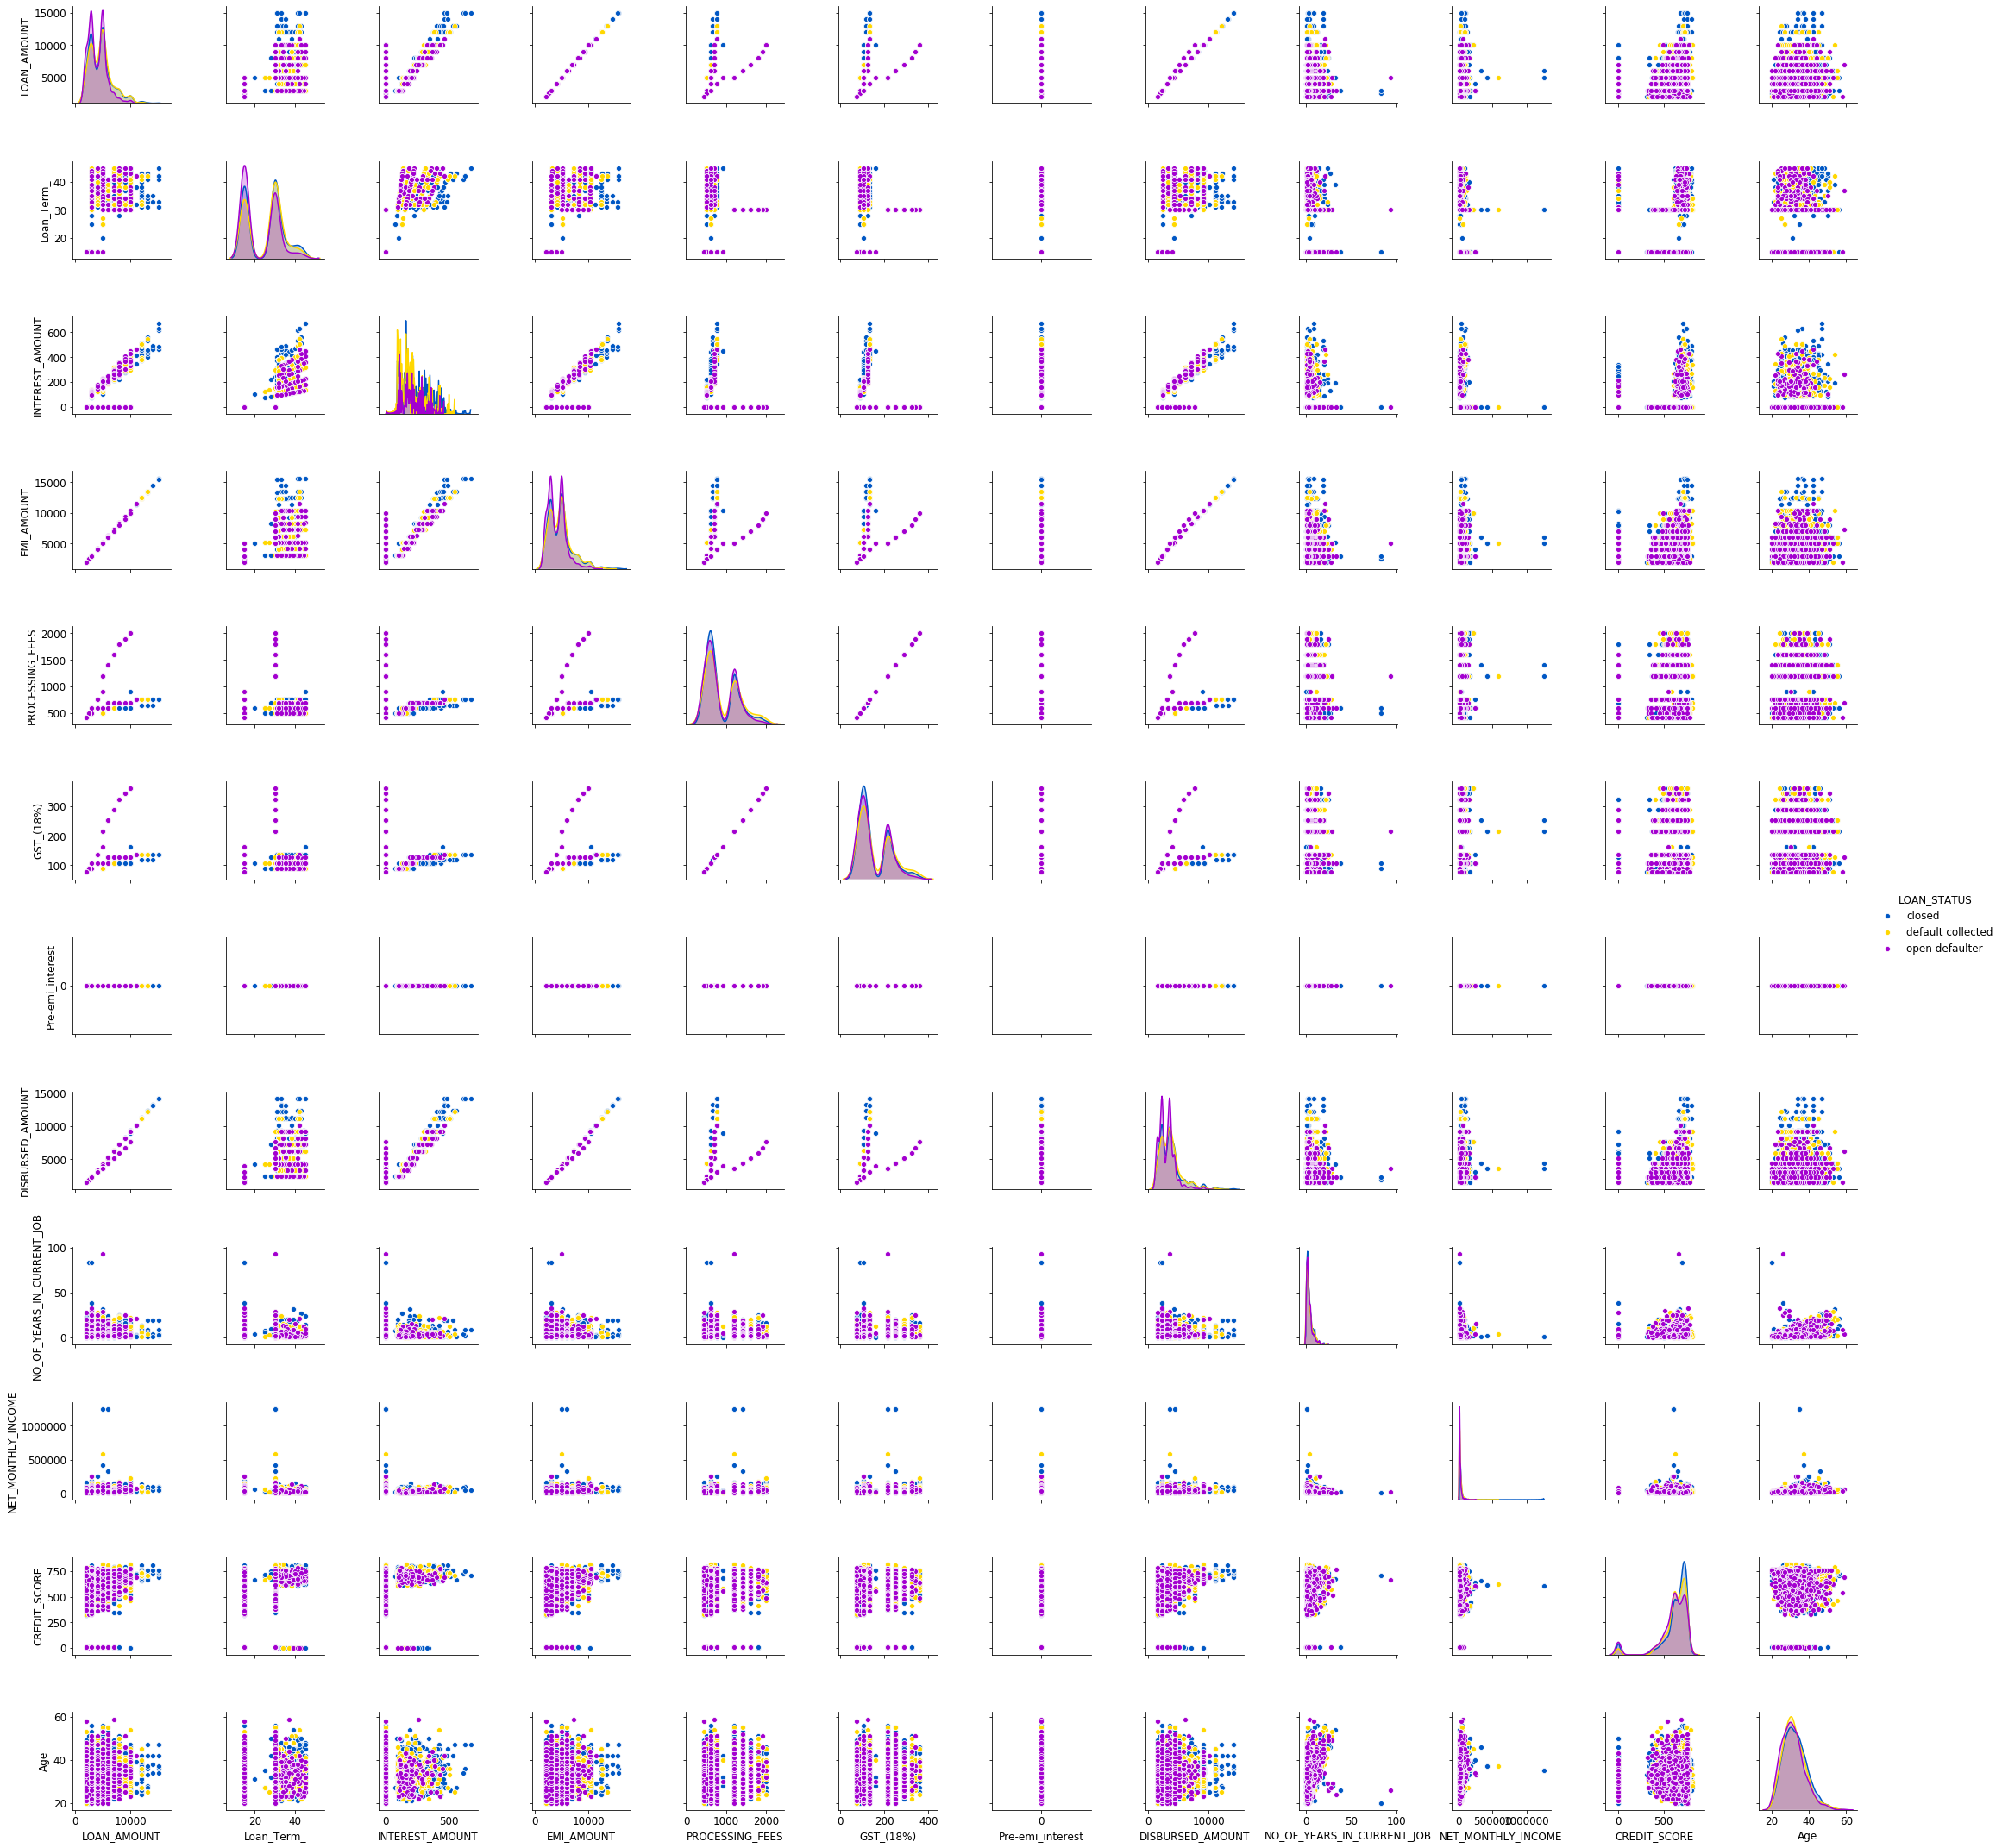

In [154]:
sns.pairplot(data1,hue='LOAN_STATUS',palette='prism')

In [155]:
#set(d1["DISBURSED_AMOUNT"])

In [156]:
#set(df_active["COMPANY_NAME"])#.value_counts()

In [137]:
#correlation matrix
#corrmat = d1.corr()
#f, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corrmat, vmax=.8, square=True)

In [149]:
#set(data1["CREDIT_SCORE"])

#data["NO_OF_YEARS_IN_CURRENT_JOB"].value_counts()
'LOAN_STATUS', 'LOAN_AMOUNT', 'Loan_Term_', 'Interest_Type',
       'INTEREST_AMOUNT', 'EMI_AMOUNT', 'PROCESSING_FEES',
       'GST_(18%)',  'DISBURSED_AMOUNT',
       'Mode_of_Disbursement', 'Lender', 'Bounce_Charges_(BC)', 'GST_ON_BC',
      # 'EMI-1_COLLECTION_STATUS', 'EMI-1COLLECTED_AMOUNT', 
     #   'Defaulter_Tenure_(DT)-1', 'Interest_Charged_(IC)-1',
      # 'GST_ON_IC-1', 'Total_Repayment-1', 
        'Total_Collected', 'REMARKS', 'Policy_ID',
       'Refund_Amount', 'Type_of_Application_', 'GENDER', 
       'MARITAL_STATUS', 'RESIDENTIAL_STATUS-OWNED/RENTED',
       
        'STATE', 'CITY',
        'OCCUPATION',# 'COMPANY_NAME', 
       'NO_OF_YEARS_IN_CURRENT_JOB',
       'COMPANY_DESIGNATION_-_MANAGER,_WORKER,_SUPERVISOR',
       'NET_MONTHLY_INCOME', 'MODE_OF_SALARY_-_CHEQUE,_NEFT,_FUND_TRANSFER',
       'CREDIT_SCORE', 'LOAN_PURPOSE', 'Payment_Frequency', 'Loan_Tenure_unit',
       'CUSTOMER'S_BANK_NAME','Age',
       Loan_Tenure_unit,Interest_Type,Mode of Disbursement,Total_Repayment-1-null 

# Using ANN

In [144]:
import keras
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

Using TensorFlow backend.


In [192]:
X1= d1.values
#X = dataset.iloc[:,:20].values
#y1 = data1["LOAN_STATUS"].values
y1 = y
y1=y1.reshape(-1, 1)
y1= ohe.fit_transform(y1)#.toarray()
#y1 = keras.utils.to_categorical(y1, num_classes=len(set(y1)), dtype='float32')

In [195]:
y1=y1.toarray()

In [257]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [339]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size = 0.20)

In [340]:
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=len(d1.columns), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [341]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [342]:
model.fit(X_train1, y_train1, epochs=35,validation_split=0.1, batch_size=64)

Train on 3393 samples, validate on 377 samples
Epoch 1/35
3393/3393 [==============================] - 0s 46us/step - loss: 1.2662 - accuracy: 0.3416 - val_loss: 1.1937 - val_accuracy: 0.4483
Epoch 2/35
3393/3393 [==============================] - 0s 28us/step - loss: 1.0202 - accuracy: 0.5261 - val_loss: 1.0885 - val_accuracy: 0.5040
Epoch 3/35
3393/3393 [==============================] - 0s 26us/step - loss: 0.9321 - accuracy: 0.5597 - val_loss: 1.0299 - val_accuracy: 0.5172
Epoch 4/35
3393/3393 [==============================] - 0s 25us/step - loss: 0.8432 - accuracy: 0.5850 - val_loss: 0.9590 - val_accuracy: 0.5305
Epoch 5/35
3393/3393 [==============================] - 0s 25us/step - loss: 0.7093 - accuracy: 0.6953 - val_loss: 0.8293 - val_accuracy: 0.7003
Epoch 6/35
3393/3393 [==============================] - 0s 24us/step - loss: 0.5130 - accuracy: 0.8635 - val_loss: 0.6443 - val_accuracy: 0.8090
Epoch 7/35
3393/3393 [==============================] - 0s 22us/step - loss: 0.2908

In [343]:
y1.shape

(4713, 3)

In [344]:
#model.fit(X1, y1, epochs=20, batch_size=64, validation_split=0.1, shuffle=True)

In [345]:
y_pred1 = model.predict(X_test1)
#Converting predictions to label
pred = list()
for i in range(len(y_pred1)):
    pred.append(np.argmax(y_pred1[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test1)):
    test.append(np.argmax(y_test1[i]))

In [346]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.15270413573701


In [350]:
d2=pd.get_dummies(df_active,drop_first=True)
list(d2.columns)

['LOAN_AMOUNT',
 'Loan_Term_',
 'INTEREST_AMOUNT',
 'EMI_AMOUNT',
 'PROCESSING_FEES',
 'GST_(18%)',
 'DISBURSED_AMOUNT',
 'NO_OF_YEARS_IN_CURRENT_JOB',
 'NET_MONTHLY_INCOME',
 'CREDIT_SCORE',
 'Age',
 'Mode_of_Disbursement_neft',
 'Type_of_Application__repeat',
 'GENDER_male',
 'MARITAL_STATUS_single',
 'RESIDENTIAL_STATUS-OWNED/RENTED_rented',
 'RESIDENTIAL_STATUS-OWNED/RENTED_self owned',
 'STATE_assam',
 'STATE_bihar',
 'STATE_chandigarh',
 'STATE_chhattisgarh',
 'STATE_delhi',
 'STATE_goa',
 'STATE_gujarat',
 'STATE_haryana',
 'STATE_himachal pradesh',
 'STATE_jharkhand',
 'STATE_karnataka',
 'STATE_kerala',
 'STATE_madhya pradesh',
 'STATE_maharashtra',
 'STATE_odisha',
 'STATE_puducherry (pondicherry)',
 'STATE_punjab',
 'STATE_rajasthan',
 'STATE_tamil nadu',
 'STATE_telangana',
 'STATE_uttar pradesh',
 'STATE_uttarakhand',
 'CITY_agra',
 'CITY_ahmedabad',
 'CITY_ahmednagar',
 'CITY_akola',
 'CITY_alappuzha',
 'CITY_aligarh',
 'CITY_allahabad',
 'CITY_alwar',
 'CITY_ambala cantt

# Active users dataset

In [358]:
X1.shape

(4713, 617)

In [360]:
X_test1.shape

(943, 617)

In [362]:
X_train1.shape

(3770, 617)

In [363]:
len(d1)

4713

In [418]:
active=pd.get_dummies(data["LOAN_STATUS"]=="active")

In [419]:
len(active)

5445

In [417]:
len(df_active.columns)

25

In [376]:
g=pd.get_dummies(data)

In [378]:
list(g.columns)

['LOAN_AMOUNT',
 'Loan_Term_',
 'INTEREST_AMOUNT',
 'EMI_AMOUNT',
 'PROCESSING_FEES',
 'GST_(18%)',
 'DISBURSED_AMOUNT',
 'NO_OF_YEARS_IN_CURRENT_JOB',
 'NET_MONTHLY_INCOME',
 'CREDIT_SCORE',
 'Age',
 'LOAN_STATUS_active',
 'LOAN_STATUS_closed',
 'LOAN_STATUS_default collected',
 'LOAN_STATUS_open defaulter',
 'Mode_of_Disbursement_imps',
 'Mode_of_Disbursement_neft',
 'Lender_apollo',
 'Lender_rhino',
 'Type_of_Application__fresh',
 'Type_of_Application__repeat',
 'GENDER_female',
 'GENDER_male',
 'MARITAL_STATUS_married',
 'MARITAL_STATUS_single',
 'RESIDENTIAL_STATUS-OWNED/RENTED_parent owned',
 'RESIDENTIAL_STATUS-OWNED/RENTED_rented',
 'RESIDENTIAL_STATUS-OWNED/RENTED_self owned',
 'STATE_andhra pradesh',
 'STATE_assam',
 'STATE_bihar',
 'STATE_chandigarh',
 'STATE_chhattisgarh',
 'STATE_dadar and nagar haveli',
 'STATE_delhi',
 'STATE_goa',
 'STATE_gujarat',
 'STATE_haryana',
 'STATE_himachal pradesh',
 'STATE_jammu and kashmir',
 'STATE_jharkhand',
 'STATE_karnataka',
 'STATE_ke

In [380]:
act=g[g["LOAN_STATUS_active"]==1]

In [381]:
other=g[g["LOAN_STATUS_active"]!=1]

In [387]:
X_other=other.values
X_other= sc.fit_transform(X_other)

y_other = data1["LOAN_STATUS"].values

y_other=le.transform(y_other)
y_other=y_other.astype("float64")

In [388]:
y_other=y_other.reshape(-1, 1)
y_other= ohe.fit_transform(y_other)
y_other=y_other.toarray()

In [389]:
X_act=act.values
X_act= sc.fit_transform(X_act)

In [399]:
model_act = Sequential()
model_act.add(Dense(16, input_dim=len(g.columns), activation='relu'))
model_act.add(Dense(12, activation='relu'))
model_act.add(Dense(3, activation='softmax'))

In [395]:
model_act.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [396]:
model_act.fit(X_other, y_other, epochs=35,validation_split=0.1, batch_size=64)

Train on 4241 samples, validate on 472 samples
Epoch 1/35
4241/4241 [==============================] - 0s 49us/step - loss: 1.2051 - accuracy: 0.4357 - val_loss: 1.2060 - val_accuracy: 0.3347
Epoch 2/35
4241/4241 [==============================] - 0s 28us/step - loss: 0.8949 - accuracy: 0.5711 - val_loss: 1.1020 - val_accuracy: 0.3750
Epoch 3/35
4241/4241 [==============================] - 0s 27us/step - loss: 0.6624 - accuracy: 0.6972 - val_loss: 0.8222 - val_accuracy: 0.7013
Epoch 4/35
4241/4241 [==============================] - 0s 28us/step - loss: 0.3577 - accuracy: 0.9146 - val_loss: 0.5399 - val_accuracy: 0.8263
Epoch 5/35
4241/4241 [==============================] - 0s 31us/step - loss: 0.1536 - accuracy: 0.9698 - val_loss: 0.4190 - val_accuracy: 0.8602
Epoch 6/35
4241/4241 [==============================] - 0s 32us/step - loss: 0.0744 - accuracy: 0.9889 - val_loss: 0.3674 - val_accuracy: 0.8750
Epoch 7/35
4241/4241 [==============================] - 0s 31us/step - loss: 0.0432

In [406]:
y_pred_act = model_act.predict(X_act)
#Converting predictions to label
pred_active = list()
for i in range(len(y_pred_act)):
    pred_active.append(np.argmax(y_pred_act[i]))
#Converting one hot encoded test label to label


In [407]:
len(df_active)

732

In [408]:
len(pred)

732

In [411]:
pred_active=list(le.inverse_transform(pred_active))

In [412]:
pred_active

['open defaulter',
 'closed',
 'default collected',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'closed',
 'open defaulter',
 'closed',
 'closed',
 'closed',
 'open defaulter',
 'closed',
 'closed',
 'closed',
 'closed',
 'open defaulter',
 'open defaulter',
 'closed',
 'closed',
 'closed',
 'closed',
 'open defaulter',
 'closed',
 'open defaulter',
 'closed',
 'closed',
 'closed',
 'closed',
 'closed',
 'open defaulter',
 'closed',
 'default collected',
 'closed',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',
 'open defaulter',
 'open defaulter',
 'open defaulter',
 'closed',